In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import missingno as msno 
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", 101)

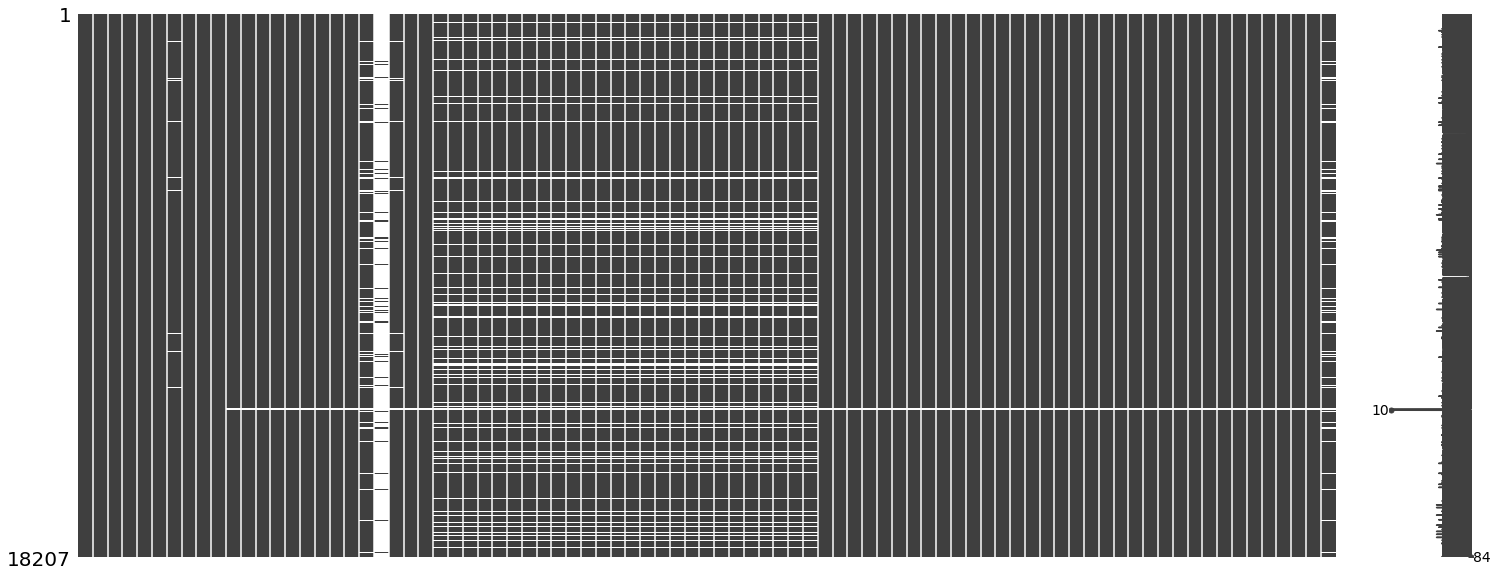

In [38]:
msno.matrix(df)


In [43]:
df['Club'].nunique()

651

# Data Cleaning and Feature Engineering

In [4]:
df2 = pd.read_csv('~/documents/notes/fifa19.csv', index_col = False)

In [5]:
df2.head()

,Club,Playing_in_League,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,https://cdn.sofifa.org/teams/2/light/243.png,€67M,€420K,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,"Aug 1, 2012",NaN,2020,5'8,146lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,https://cdn.sofifa.org/teams/2/light/243.png,€51M,€380K,2201,Right,4.0,3.0,3.0,High/ Medium,Normal,Yes,RCB,15.0,"Aug 1, 2005",NaN,2020,6'0,181lbs,73+3,73+3,73+3,70+3,71+3,71+3,71+3,70+3,71+3,71+3,71+3,72+3,75+3,75+3,75+3,72+3,81+3,84+3,84+3,84+3,81+3,84+3,87+3,87+3,87+3,84+3,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
2,Real Madrid,Spain Primera Division (1),182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,https://cdn.sofifa.org/teams/2/light/243.png,€76.5M,€355K,2190,Right,4.0,5.0,3.0,Medium/ Medium,Normal,Yes,LCM,8.0,"Jul 17, 2014",NaN,2022,6'0,168lbs,78+3,78+3,78+3,81+3,82+3,82+3,82+3,81+3,84+3,84+3,84+3,82+3,86+3,86+3,86+3,82+3,79+3,82+3,82+3,82+3,79+3,77+3,72+3,72+3,72+3,77+3,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
3,Real Madrid,Spain Primera Division (1),192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,https://cdn.sofifa.org/teams/2/light/243.png,€53.5M,€240K,1311,Left,4.0,2.0,1.0,Medium/ Medium,Courtois,Yes,GK,1.0,"Aug 9, 2018",NaN,2024,6'6,212lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
4,Real Madrid,Spain Primera Division (1),200145,Casemiro,26,https://cdn.sofifa.org/players/4/19/200145.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,90,https://cdn.sofifa.org/teams/2/light/243.png,€59.5M,€285K,2170,Right,3.0,3.0,2.0,Medium/ High,Normal,Yes,CDM,14.0,"Jul 11, 2013",NaN,2021,6'1,185lbs,72+3,72+3,72+3,69+3,73+3,73+3,73+3,69+3,74+3,74+3,74+3,71+3,80+3,80+3,80+3,71+3,78+3,85+3,85+3,85+3,78+3,79+3,85+3,85+3,85+3,79+3,52.0,59.0,76.0,85.0,53.0,69.0,59.0,74.0,82.0,78.0,59.0,65.0,62.0,84.0,66.0,86.0,88.0,87.0,89.0,79.0,87.0,87.0,69.0,77.0,66.0,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M


In [6]:
df2.sort_values(by=['Overall'], ascending = False).head(50)

,Club,Playing_in_League,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
189,Juventus,Italian Serie A (1),20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
99,FC Barcelona,Spain Primera Division (1),158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
214,Paris Saint-Germain,French Ligue 1 (1),190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,https://cdn.sofifa.org/teams/2/light/243.png,€67M,€420K,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,"Aug 1, 2012",NaN,2020,5'8,146lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
33,Manchester United,English Premier League (1),193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,https://cdn.sofifa.org/teams/2/light/243.png,€51M,€380K,2201,Right,4.0,3.0,3

In [7]:
df2.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,16344.000000,16344.000000,16344.000000,16344.000000,16344.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000,16304.000000
mean,213628.292952,25.044726,66.450930,71.617230,1603.075012,1.123467,2.952711,2.375184,19.658182,49.978410,45.731600,52.467554,58.906587,43.191855,55.639720,47.518523,43.069001,52.923700,58.662905,64.661494,64.776435,63.605986,62.046860,63.906219,55.787782,65.179404,63.298209,65.459396,47.334642,56.162414,46.866413,50.112488,53.627699,48.686396,58.938911,47.421860,47.936887,45.889966,16.629784,16.401742,16.236261,16.407875,16.724853
std,30597.625486,4.686098,7.006805,6.165413,275.013540,0.411339,0.662086,0.763759,16.005064,18.451726,19.578524,17.434510,14.756144,17.836719,18.998032,18.494344,17.561758,15.337578,16.734841,15.010632,14.736114,14.768842,9.121009,14.188654,17.266215,11.856955,15.935846,12.501009,19.328131,17.415729,20.789746,19.614936,14.189991,15.757333,11.509419,20.008307,21.738039,21.372031,17.749709,16.964664,16.555921,17.081548,18.014439
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,6.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,8.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,199420.500000,21.000000,62.000000,67.000000,1461.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,45.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,56.000000,56.000000,56.000000,46.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,39.000000,44.000000,39.000000,52.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221335.500000,25.000000,66.000000,71.000000,1642.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,63.000000,44.000000,61.000000,49.000000,42.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,60.000000,66.000000,67.000000,67.000000,52.000000,59.000000,52.000000,55.000000,55.000000,50.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236464.500000,28.000000,71.000000,76.000000,1794.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,65.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,69.000000,73.000000,74.000000,74.000000,63.000000,70.000000,64.000000,65.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.

In [8]:
#drop unwanted columns
df2.drop(['Photo','Flag','Club Logo'],axis=1,inplace=True)

In [9]:
df2['Playing_in_League'].unique()

array(['Spain Primera Division (1)', 'English Premier League (1)',
       'Italian Serie A (1)', 'French Ligue 1 (1)',
       'German 1. Bundesliga (1)', 'Portuguese Liga ZON SAGRES (1)',
       'Holland Eredivisie (1)', 'Turkish Süper Lig (1)',
       'Scottish Premiership (1)', 'Belgian Jupiler Pro League (1)',
       'English League Championship (2)', 'German 2. Bundesliga (2)',
       'Rest of World', 'Argentina Primera División \xa0(1)',
       'Austrian Football Bundesliga (1)', 'USA Major League Soccer (1)',
       'English League One (3)', 'Italian Serie B (2)',
       'Colombian Liga Postobón (1)', 'Mexican Liga MX (1)',
       'Spanish Segunda División (2)',
       'Campeonato Brasileiro Série A (1)', 'English League Two (4)',
       'Danish Superliga (1)', 'Swiss Super League (1)',
       'French Ligue 2 (2)', 'Polish T-Mobile Ekstraklasa (1)',
       'Norwegian Eliteserien (1)', 'Chinese Super League (1)',
       'Japanese J. League Division 1 (1)', 'German 3. Bundesliga (3

In [10]:
#select top 5 leauges in Europe:
df=df2[(df2["Playing_in_League"]=='Italian Serie A (1)')|
    (df2["Playing_in_League"]=='French Ligue 1 (1)')|(df2["Playing_in_League"]=='English Premier League (1)')|
    (df2["Playing_in_League"]=='Spain Primera Division (1)') |(df2["Playing_in_League"]=='German 1. Bundesliga (1)')]

In [12]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000
mean,208972.880829,24.720898,72.574784,78.037651,1719.212090,1.443099,3.050502,2.640263,20.524732,55.293670,49.816672,56.607748,65.028018,48.006572,61.427188,52.998270,46.992736,58.468004,64.937392,65.923210,66.069872,65.308544,68.710827,64.549637,60.935316,66.560706,64.544448,67.060879,52.451055,60.117606,51.847804,54.710827,58.931857,51.719128,65.556209,52.054652,52.609478,50.228641,17.398478,17.093047,16.687305,17.134556,17.510896
std,30740.911362,4.592386,7.378586,5.374274,298.761702,0.716438,0.693177,0.883895,16.008032,20.341153,21.563689,19.239730,15.881141,19.950205,20.597909,20.255897,19.248447,16.291291,18.216097,14.750156,14.469487,14.374198,9.579358,14.461207,18.431683,11.786158,16.084219,12.199712,21.078300,18.391231,23.274836,21.770335,15.429621,16.882988,11.558182,22.316126,24.284716,24.217854,19.940907,19.079944,18.225323,19.244166,20.244905
min,768.000000,16.000000,50.000000,58.000000,792.000000,1.000000,1.000000,1.000000,1.000000,7.000000,5.000000,8.000000,11.000000,4.000000,5.000000,6.000000,7.000000,10.000000,9.000000,13.000000,16.000000,21.000000,33.000000,20.000000,11.000000,26.000000,13.000000,24.000000,5.000000,11.000000,3.000000,2.000000,12.000000,9.000000,13.000000,3.000000,9.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,192984.500000,21.000000,68.000000,75.000000,1553.000000,1.000000,3.000000,2.000000,9.000000,43.000000,32.000000,48.000000,60.000000,33.000000,55.000000,40.000000,33.000000,49.000000,61.000000,58.000000,58.000000,57.000000,63.000000,56.000000,51.500000,60.000000,56.000000,60.000000,37.000000,48.000000,28.000000,42.000000,48.500000,42.000000,59.000000,31.000000,29.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,212190.000000,24.000000,74.000000,78.000000,1784.000000,1.000000,3.000000,3.000000,18.000000,61.000000,54.000000,60.000000,69.000000,50.000000,68.000000,57.000000,46.000000,62.000000,70.000000,68.000000,68.000000,67.000000,70.000000,66.000000,66.000000,68.000000,68.000000,68.000000,58.000000,65.000000,59.000000,61.000000,61.000000,53.000000,67.000000,59.000000,62.000000,58.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,232103.000000,28.000000,77.000000,82.000000,1943.000000,2.000000,3.000000,3.000000,28.000000,71.000000,68.000000,70.000000,76.000000,64.000000,75.000000,69.000000,62.500000,70.000000,76.000000,76.000000,76.000000,76.000000,75.000000,75.000000,75.000000,74.500000,76.000000,76.000000,69.000000,74.000000,73.000000,71.000000,71.000000,64.000000,74.000000,71.000000,74.000000,72.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246616.000000,40.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,93.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,94.000000,94.000000,94.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


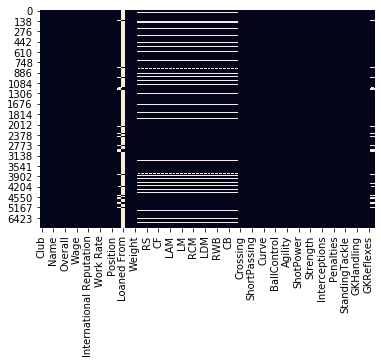

In [13]:
#Checked for missing values 
sns.heatmap(df.isnull(), cbar=False)

In [14]:
df.columns

Index(['Club', 'Playing_in_League', 'ID', 'Name', 'Age', 'Nationality',
       'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GK

In [15]:
#dropped more unnecessary colummns
df.drop(['Jersey Number','Loaned From' ],axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [563]:
df.head()

,Club,Playing_in_League,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,years_left_contract,Continent,position
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,Croatia,91,91,67000000.0,420000.0,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,2020-01-01,68,146,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,2,Europe,Midfield
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,Spain,91,91,51000000.0,380000.0,2201,Right,4.0,3.0,3.0,High/ Medium,Normal,Yes,RCB,2020-01-01,72,181,73+3,73+3,73+3,70+3,71+3,71+3,71+3,70+3,71+3,71+3,71+3,72+3,75+3,75+3,75+3,72+3,81+3,84+3,84+3,84+3,81+3,84+3,87+3,87+3,87+3,84+3,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,2,Europe,Defence
2,Real Madrid,Spain Primera Division (1),182521,T. Kroos,28,Germany,90,90,76500000.0,355000.0,2190,Right,4.0,5.0,3.0,Medium/ Medium,Normal,Yes,LCM,2022-01-01,72,168,78+3,78+3,78+3,81+3,82+3,82+3,82+3,81+3,84+3,84+3,84+3,82+3,86+3,86+3,86+3,82+3,79+3,82+3,82+3,82+3,79+3,77+3,72+3,72+3,72+3,77+3,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,4,Europe,Midfield
3,Real Madrid,Spain Primera Division (1),192119,T. Courtois,26,Belgium,89,90,53500000.0,240000.0,1311,Left,4.0,2.0,1.0,Medium/ Medium,Normal,Yes,GK,2024-01-01,78,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,6,Europe,Goalkeeper
4,Real Madrid,Spain Primera Division (1),200145,Casemiro,26,Brazil,88,90,59500000.0,285000.0,2170,Right,3.0,3.0,2.0,Medium/ High,Normal,Yes,CDM,2021-01-01,73,185,72+3,72+3,72+3,69+3,73+3,73+3,73+3,69+3,74+3,74+3,74+3,71+3,80+3,80+3,80+3,71+3,78+3,85+3,85+3,85+3,78+3,79+3,85+3,85+3,85+3,79+3,52.0,59.0,76.0,85.0,53.0,69.0,59.0,74.0,82.0,78.0,59.0,65.0,62.0,84.0,66.0,86.0,88.0,87.0,89.0,79.0,87.0,87.0,69.0,77.0,66.0,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,3,South America,Midfield


In [17]:
#just a search
df[df['Club']=='Manchester City']

,Club,Playing_in_League,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
271,Manchester City,English Premier League (1),192985,K. De Bruyne,27,Belgium,91,92,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
272,Manchester City,English Premier League (1),168542,David Silva,32,Spain,90,90,€60M,€285K,2115,Left,4.0,2.0,4.0,High/ Medium,Normal,Yes,LCM,"Jul 14, 2010",2020,5'8,148lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,85+3,85+3,85+3,85+3,85+3,69+3,70+3,70+3,70+3,69+3,64+3,57+3,57+3,57+3,64+3,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
273,Manchester City,English Premier League (1),153079,S. Agüero,30,Argentina,89,89,€64.5M,€300K,2107,Right,4.0,4.0,4.0,High/ Medium,Stocky,Yes,ST,"Jul 28, 2011",2021,5'8,154lbs,86+3,86+3,86+3,86+3,87+3,87+3,87+3,86+3,85+3,85+3,85+3,83+3,76+3,76+3,76+3,83+3,58+3,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
274,Manchester City,English Premier League (1),222492,L. Sané,22,Germany,86,92,€61M,€195K,2090,Left,2.0,3.0,4.0,High/ Medium,Lean,Yes,LW,"Aug 2, 2016",2021,6'0,165lbs,82+2,82+2,82+2,84+2,84+2,84+2,84+2,84+2,82+2,82+2,82+2,83+2,74+2,74+2,74+2,83+2,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2,83.0,81.0,72.0,79.0,85.0,88.0,82.0,68.0,64.0,85.0,93.0,96.0,88.0,81.0,81.0,86.0,64.0,79.0,70.0,78.0,61.0,34.0,84.0,82.0,71.0,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,€125.1M
275,Manchester City,English Premier League (1),218667,Bernardo Silva,23,Portugal,86,91,€59.5M,€180K,2039,Left,2.0,3.0,4.0,High/ Medium,Lean,Yes,RW,"Jul 1, 2017",2022,5'8,141lbs,75+2,75+2,75+2,84+2,82+2,82+2,82+2,84+2,84+2,84+2,84+2,84+2,80+2,80+2,80+2,84+2,68+2,65+2,65+2,65+2,68+2,63+2,53+2,53+2,53+2,63+2,85.0,75.0,51.0,85.0,69.0,92.0,83.0,67.0,79.0,91.0,84.0,74.0,90.0,82.0,88.0,70.0,50.0,78.0,48.0,72.0,58.0,49.0,83.0,86.0,68.0,85.0,49.0,44.0,35.0,9.0,10.0,14.0,12.0,9.0,€114.5M
276,Manchester City,English Premier League (1),210257,Ederson,24,Brazil,86,90,€41.5M,€125K,1463,Left,2.0,3.0,1.0,Medium/ Medium,Normal,Yes,GK,"Jul 1, 2017",2025,6'2,190lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,14.0,14.0,56.0,18.0,23.0,15.0,20.0,58.0,37.0,64.0,63.0,60.0,86.0,48.0,42.0,58.0,41.0,68.0,18.0,35.0,25.0,20.0,67.0,17.0,70.0,28.0,15.0,8.0,85.0,80.0,91.0,82.0,87.0,€79.9M
277,Manchester City,English Premier League (1),202652,R. Sterling,23,England,86,89,€56.5M,€195K,2036,Right,3.0,3.0,4.0,High/ Medium,Lean,Yes,RW,"Jul 14, 2015",2023,5'7,152lbs,76+3,76+3,76+3,84+3,83+3,83+3,83+3,84+3,83+3,83+3,83+3,84+3,77+3,77+3,77+3,84+3,69+3,63+3,63+3,63+3,69+3,66+3,52+3,52+3,52+3,66+3,77.0,77.0,38.0,84.0,67.0,88.0,70.0,63.0,69.0,87.0,95.0,92.0,93.0,87.0,93.0,73.0,57.0,78.0,52.0,73.0,38.0,30.0,87.0,77.0,69.0,77.0,47.0,58.0,54.0,15.0,12

In [18]:
#check for null
df.Value.isnull().sum()

0

In [19]:
# # clean up the target variable (Value), convert the K to 1000 the M to millions and remove the euros
# df['Value'] = df['Value'].str.replace('€','')
# df['Value'] = df['Value'].str.replace('M',' 1000000')
# df['Value'] = df['Value'].str.replace('K',' 1000')
# df['Value'] = df['Value'].str.split(' ', expand=True)[0].astype(float) * df['Value'].str.split(' ', expand=True)[1].astype(float)


In [20]:
#function to clean the column with currency notations and value abbrevations

def clean_values(value):
    remove= value.replace('€', '')
    if 'M'in remove:
        remove= float(remove.replace('M', ''))*1000000
    elif 'K'in value:
        remove= float(remove.replace('K', ''))*1000
    return float(remove)
    

In [21]:
# clean up the target variable (Value), convert the K to 1000 the M to millions and remove the euros
df['Value'] = df['Value'].apply(lambda x: clean_values(x))
#clean wages
df['Wage'] = df['Wage'].apply(lambda x: clean_values(x))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
#clean realease clause

df['Release Clause'] = df['Release Clause'].replace('€', '')
# df['Release Clause'] = df['Release Clause'].replace('', '')
df['Release Clause'] = df['Release Clause'].apply(lambda x: str(x))
df['Release Clause'] = df['Release Clause'].apply(lambda x: clean_values(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [23]:
df['Release Clause'].unique()#value_counts()

array([1.374e+08, 1.046e+08, 1.568e+08, 1.137e+08, 1.264e+08, 1.562e+08,
       8.820e+07, 1.230e+08, 6.250e+07, 1.063e+08, 1.215e+08, 7.590e+07,
       6.690e+07, 5.540e+07, 5.210e+07, 5.630e+07, 4.160e+07, 4.250e+07,
       3.600e+07, 1.540e+07, 3.040e+07, 4.680e+07, 1.910e+07, 3.200e+06,
       2.700e+06, 2.600e+06, 2.000e+06, 2.300e+06, 2.200e+06, 1.600e+06,
       2.100e+06, 7.880e+05, 1.386e+08, 1.232e+08, 1.203e+08, 6.940e+07,
       8.710e+07, 4.440e+07, 4.530e+07, 5.100e+07, 4.310e+07, 3.240e+07,
       3.080e+07, 1.850e+07, 3.180e+07, 1.670e+07, 2.970e+07, 2.310e+07,
       2.130e+07, 1.300e+07, 2.870e+07, 1.110e+07, 2.500e+06, 9.600e+06,
       7.800e+06, 4.300e+06, 2.900e+06, 1.400e+06, 1.700e+06, 1.373e+08,
       1.027e+08, 8.790e+07, 1.047e+08, 7.210e+07, 6.720e+07, 4.840e+07,
       3.420e+07, 4.370e+07, 3.160e+07, 3.610e+07, 2.570e+07, 3.850e+07,
       2.960e+07, 2.950e+07, 2.270e+07, 1.520e+07, 2.940e+07, 3.050e+07,
       2.370e+07, 1.780e+07, 1.380e+07, 9.900e+06, 

In [24]:
df.Height.isnull().sum()

4

In [25]:
# df['Height']= df['Height'].apply(lambda x:x.split("'"))


In [26]:
#checked for null values in  heights
df[df['Height'].isnull()]

,Club,Playing_in_League,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
672,Everton,English Premier League (1),233782,M. Feeney,19,England,62,78,600000.0,5000.0,1328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2117,VfB Stuttgart,German 1. Bundesliga (1),246328,A. Aidonis,17,Germany,62,82,550000.0,2000.0,1418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3029,Bologna,Italian Serie A (1),245564,Vinicius,19,Brazil,62,77,525000.0,1000.0,1141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4190,Montpellier HSC,French Ligue 1 (1),244543,Y. Ammour,19,France,62,77,650000.0,2000.0,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#drop missing values in height column
df.dropna(subset=['Height'], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
#function to clean the height columns # its a float object, so index and change to in
def clean_height(ht):
    ht= str(ht)
    ht= ht.strip(" ")
    ht= ht.split("'")
    return((int(ht[0])*12)+int(ht[1]))
    

In [29]:
#clean the heights
df['Height']= df['Height'].map(lambda x: clean_height (x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [564]:
#change height to a numeric value
df['Height']= pd.to_numeric(df['Height'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# # Examining duplicate rows
# df.loc[df.duplicated(), :].sort_values('Name')

In [32]:
df.Height= df.Height.astype(str)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [34]:
#function to clean the weights
def clean_weight(wt):
    wt= wt.replace("lbs", "")
    wt = int(wt)
    return wt

In [35]:
#clean weight column
df['Weight']= df['Weight'].map(lambda x: clean_weight (x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
# clean year joined (date joined) and contract valid until column change to datetime 
df['Joined']= pd.to_datetime(df['Joined'])
df['Contract Valid Until']= pd.to_datetime(df['Contract Valid Until'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
type(df['Contract Valid Until'])

pandas.core.series.Series

In [39]:
pd.DatetimeIndex(df['Joined']).year

Float64Index([2012.0, 2005.0, 2014.0, 2018.0, 2013.0, 2013.0, 2007.0, 2013.0,
              2014.0, 2011.0,
              ...
              2012.0, 2015.0, 2018.0, 2018.0, 2018.0,    nan,    nan, 2017.0,
              2017.0, 2018.0],
             dtype='float64', name='Joined', length=2891)

In [40]:
#creating a different column called contract lenght which would be the years left on contract. Might be useful
df['years_left_contract']= pd.DatetimeIndex(df['Contract Valid Until']).year.map(lambda x: int(x)-2018) 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


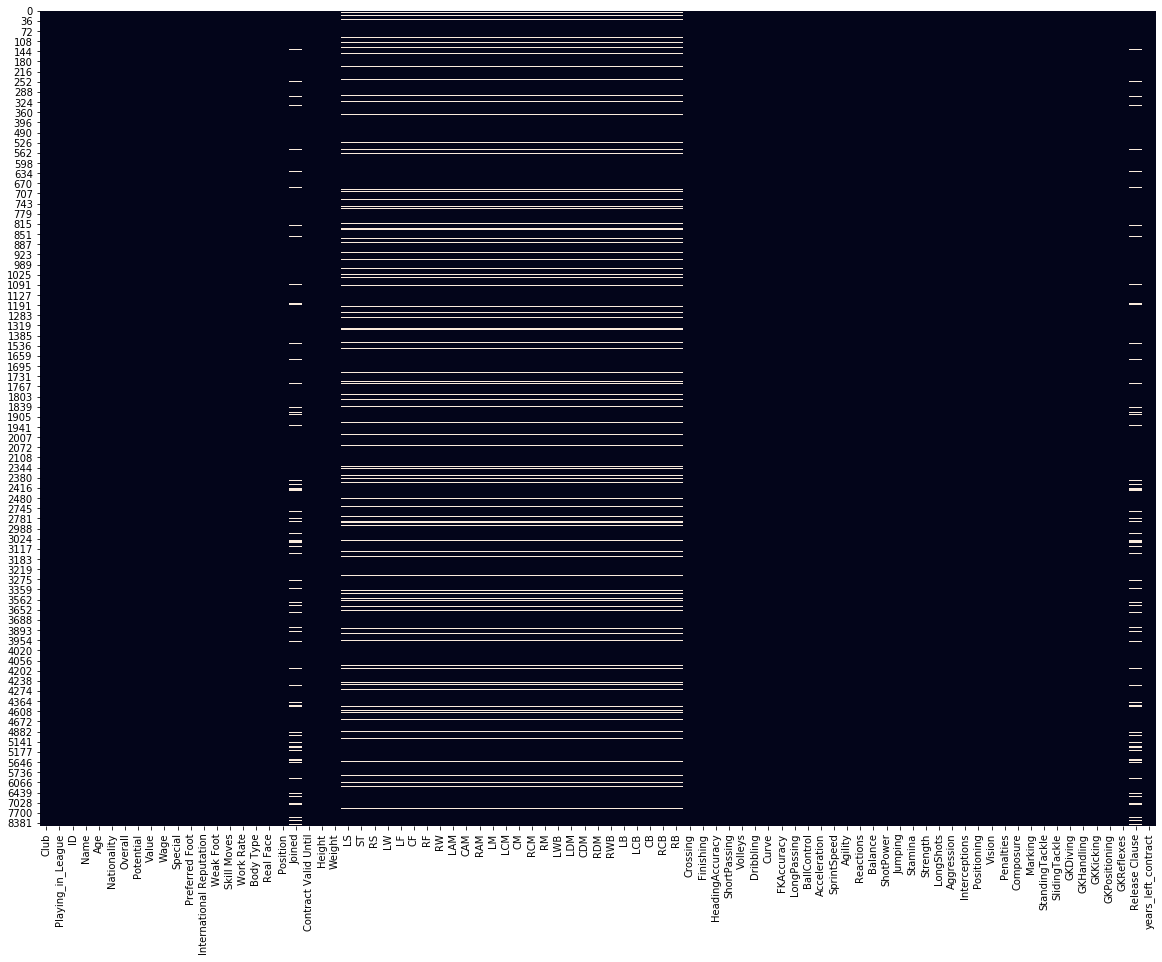

In [41]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.isnull(), cbar=False)

In [42]:
#saved data frame in df3 just incase
df3=df

In [43]:
#drop unnnecessary columns (joined and realease clause)
df.drop(columns= ['Joined','Release Clause'], axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
#creating a dictionary of continents 
# mapping countries to their continents - dictionary
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia', 'New Zealand'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

In [45]:
# function to countries to their continents - dictionary, takes in the country, returns a continent it belongs to from dictionary
def find_continent(x, continents_list):
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN



In [46]:
#create columns with players mapped to there continents
df['Continent'] = df['Nationality'].apply(lambda x: find_continent(x, continents))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
# Dictionary for defining grouped player positions
#mapping players to position category
pos_dict = {
    'Attack' : ['ST','RW','LW', 'CF'],
    'Midfield': ['RM', 'CM', 'LM', 'CAM', 'CDM', 'RCM', 'LCM'],
    'Defence': ['CB', 'LB', 'RB', 'RWB', 'LWB', 'RCB', 'LCB'],
    'Goalkeeper': ['GK']}
pos_dict
#function to map abbreivations to actual postitions
def find_position(x, pos_list):
    for key in pos_list:
        if x in pos_list[key]:
            return key
    return np.NaN

In [48]:
#creating a new column called position to map the abbrevations to the actual positions
df['position'] = df['Position'].apply(lambda x: find_position(x, pos_dict))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
df['Body Type'].unique()

array(['Lean', 'Normal', 'Courtois', 'Stocky', 'PLAYER_BODY_TYPE_25',
       'Shaqiri', 'Messi', 'C. Ronaldo', 'Neymar'], dtype=object)

In [50]:
#clean body type

df.loc[df['Body Type'] == 'PLAYER_BODY_TYPE_25', 'Body Type'] = 'Normal'
df.loc[df['Body Type'] == 'Messi', 'Body Type'] = 'Lean'
df.loc[df['Body Type'] == 'Shaqiri', 'Body Type'] = 'Stocky'
df.loc[df['Body Type'] == 'Neymar', 'Body Type'] = 'Lean'
df.loc[df['Body Type'] == 'Akinfenwa', 'Body Type'] = 'Stocky'
df.loc[df['Body Type'] == 'C. Ronaldo', 'Body Type'] = 'Normal'
df.loc[df['Body Type'] == 'Courtois', 'Body Type'] = 'Normal'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [559]:
#df[(df['Body Type'] == 'Stocky')].sort_values(by= "Weight", ascending= False)#& (df['Nationality']=='Argentina')]

In [561]:
#df[df['position']=='Goalkeeper'].info()

In [562]:
df['Weight'].sum()

486515

# Visualizations and EDA

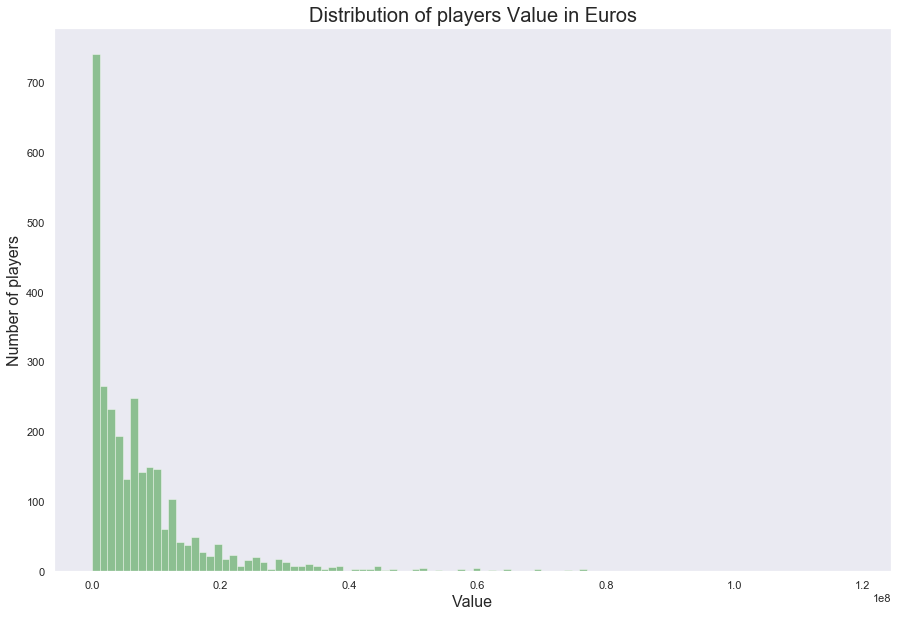

In [57]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = df.Value
plt.figure(figsize=(15,10))
ax = sns.distplot(x, bins = 100, kde = False, color='green', norm_hist=False)
ax.set_xlabel(xlabel="Value", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Distribution of players Value in Euros', fontsize=20)
plt.show()

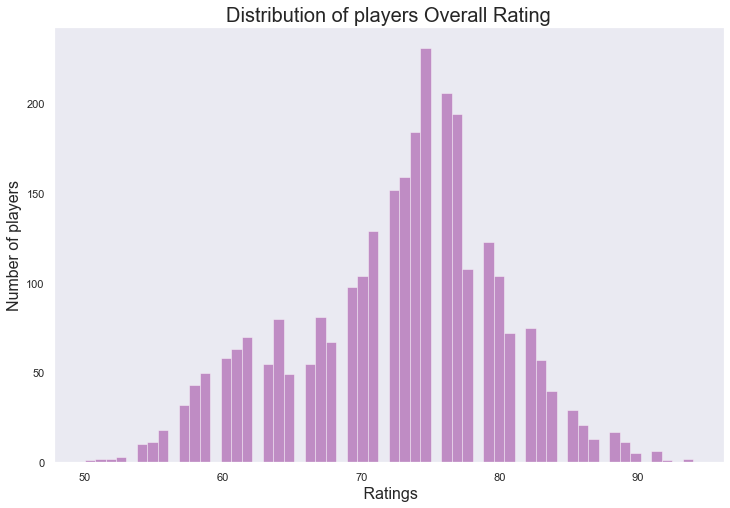

In [58]:
# Histogram: number of players's age
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = df.Overall
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='purple')
ax.set_xlabel(xlabel=" Ratings", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Distribution of players Overall Rating', fontsize=20)
plt.show()

In [59]:
bynations= df.groupby(by= "Nationality")
bynations.count

<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fc46352d790>>

In [60]:
byleauges= df.groupby(by='Playing_in_League')
byleauges['Name'].count()

Playing_in_League
English Premier League (1)    648
French Ligue 1 (1)            568
German 1. Bundesliga (1)      547
Italian Serie A (1)           545
Spain Primera Division (1)    583
Name: Name, dtype: int64

In [61]:
#Number of countires playing
len(df["Nationality"].unique())

100

In [62]:
#data frame of forigen players
df_for=df[(df["Nationality"]!='Spain')&(df["Nationality"]!='England')&
   (df["Nationality"]!='Germany')&(df["Nationality"]!='France')&(df["Nationality"]!='Italy')]


In [63]:
bynationsfor= df_for.groupby(by= 'Playing_in_League')
bynationsfor['Name'].count()

Playing_in_League
English Premier League (1)    302
French Ligue 1 (1)            239
German 1. Bundesliga (1)      238
Italian Serie A (1)           271
Spain Primera Division (1)    175
Name: Name, dtype: int64

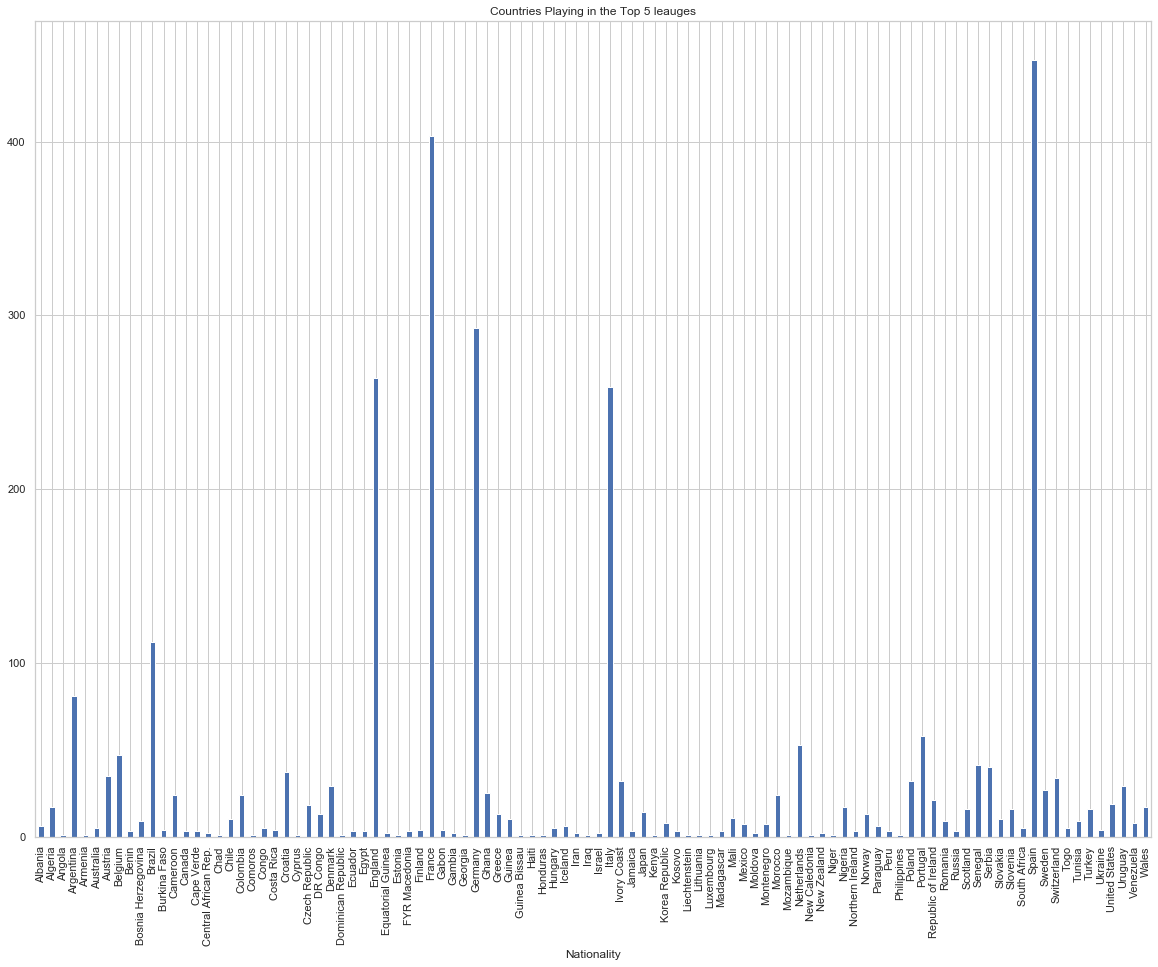

In [64]:
sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

plt.figure( figsize=(20,15))
#the_grid = GridSpec(2, 2)

plt.subplot(title='Countries Playing in the Top 5 leauges')
bynations['Name'].count().plot(kind = 'bar')
# sns.barplot(x='FoodCode',y='Source', data=df, palette='Spectral')
# plt.subplot(the_grid[0, 0], title='Selected Flavors of Pies')

# sns.barplot(x='Source',y='FoodCode', data=flavor_data, palette='Spectral')

# plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)

In [65]:
len(df['Nationality'].unique())

100

In [66]:
#grouped by league and nations
byleaugesnNa= df.groupby(by=['Playing_in_League', 'Nationality'])
plt.figure( figsize=(20,15))
lnun= byleaugesnNa.count()['Name'].unstack()
lnun

Nationality,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Belgium,Benin,Bosnia Herzegovina,Brazil,Burkina Faso,Cameroon,Canada,Cape Verde,Central African Rep.,Chad,Chile,Colombia,Comoros,Congo,Costa Rica,Croatia,Cyprus,Czech Republic,DR Congo,Denmark,Dominican Republic,Ecuador,Egypt,England,Equatorial Guinea,Estonia,FYR Macedonia,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guinea,Guinea Bissau,Haiti,Honduras,Hungary,Iceland,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Japan,Kenya,Korea Republic,Kosovo,Liechtenstein,Lithuania,Luxembourg,Madagascar,Mali,Mexico,Moldova,Montenegro,Morocco,Mozambique,Netherlands,New Caledonia,New Zealand,Niger,Nigeria,Northern Ireland,Norway,Paraguay,Peru,Philippines,Poland,Portugal,Republic of Ireland,Romania,Russia,Scotland,Senegal,Serbia,Slovakia,Slovenia,South Africa,Spain,Sweden,Switzerland,Togo,Tunisia,Turkey,Ukraine,United States,Uruguay,Venezuela,Wales
Playing_in_League,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
English Premier League (1),NaN,2.0,NaN,16.0,1.0,3.0,6.0,17.0,1.0,2.0,20.0,NaN,3.0,1.0,NaN,NaN,NaN,2.0,5.0,NaN,NaN,NaN,2.0,1.0,2.0,4.0,13.0,NaN,1.0,3.0,254.0,1.0,NaN,NaN,NaN,31.0,3.0,NaN,NaN,15.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,1.0,9.0,5.0,2.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,1.0,2.0,NaN,21.0,NaN,2.0,NaN,7.0,3.0,7.0,1.0,NaN,1.0,5.0,19.0,21.0,2.0,NaN,16.0,6.0,4.0,1.0,1.0,NaN,37.0,4.0,7.0,1.0,1.0,2.0,2.0,5.0,2.0,2.0,16.0
French Ligue 1 (1),NaN,7.0,NaN,6.0,NaN,NaN,NaN,13.0,2.0,NaN,27.0,3.0,11.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,4.0,NaN,4.0,NaN,2.0,6.0,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,310.0,1.0,NaN,NaN,3.0,1.0,2.0,4.0,1.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,6.0,16.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN,3.0,8.0,NaN,NaN,1.0,11.0,1.0,3.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,3.0,10.0,NaN,1.0,1.0,NaN,20.0,7.0,2.0,3.0,4.0,7.0,5.0,3.0,2.0,8.0,2.0,NaN,2.0,3.0,NaN,NaN
German 1. Bundesliga (1),1.0,2.0,NaN,6.0,NaN,2.0,28.0,6.0,NaN,2.0,15.0,NaN,4.0,1.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,9.0,NaN,8.0,2.0,6.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,23.0,NaN,NaN,NaN,268.0,4.0,4.0,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.0,4.0,2.0,1.0,7.0,NaN,2.0,2.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.0,3.0,NaN,16.0,NaN,NaN,NaN,2.0,NaN,5.0,1.0,1.0,NaN,8.0,5.0,NaN,1.0,1.0,NaN,2.0,6.0,4.0,1.0,1.0,10.0,10.0,17.0,1.0,NaN,7.0,1.0,12.0,1.0,1.0,NaN
Italian Serie A (1),4.0,4.0,1.0,27.0,NaN,NaN,1.0,7.0,NaN,4.0,30.0,1.0,2.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,18.0,NaN,5.0,NaN,6.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,17.0,NaN,2.0,1.0,5.0,9.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,235.0,7.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,2.0,3.0,NaN,11.0,NaN,NaN,NaN,4.0,NaN,NaN,2.0,NaN,NaN,16.0,10.0,NaN,3.0,NaN,NaN,8.0,17.0,3.0,10.0,NaN,15.0,7.0,7.0,NaN,NaN,3.0,NaN,NaN,9.0,2.0,NaN
Spain Primera Division (1),1.0,2.0,NaN,26.0,NaN,NaN,NaN,4.0,NaN,1.0,20.0,NaN,4.0,NaN,NaN,1.0,NaN,4.0,11.0,NaN,1.0,2.0,4.0,NaN,1.0,1.0,2.0,1.0,NaN,NaN,1.0,1.0,NaN,2.0,NaN,22.0,NaN,NaN,NaN,2.0,7.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,5.0,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,1.0,NaN,NaN,14.0,NaN,2.0,1.0,NaN,5.0,6.0,NaN,1.0,NaN,378.0,1.0,NaN,1.0,NaN,2.0,1.0,NaN,14.0,3.0,1.0


<Figure size 1440x1080 with 0 Axes>

In [67]:
#grouped the data by continents and leuages
byleaugesnCo= df.groupby(by=['Playing_in_League', 'Continent'])
plt.figure( figsize=(20,15))
legCo= byleaugesnCo.count()['Name'].unstack(level='Continent').apply(lambda x:100 * x / float(x.sum()), axis=1)
legCo
#legCo(level='Playing_in_League').plot(kind='bar')
#data.groupby(['date','type']).count()['amount'].unstack().plot(ax=ax)

Continent,Africa,Asia,Australia Oceania,Europe,North America,South America
Playing_in_League,,,,,,
English Premier League (1),7.407407,1.543210,0.771605,81.172840,1.543210,7.561728
French Ligue 1 (1),21.164021,1.410935,0.176367,69.488536,0.705467,7.054674
German 1. Bundesliga (1),4.570384,3.290676,0.365631,83.729433,2.925046,5.118830
Italian Serie A (1),7.889908,0.733945,NaN,76.697248,0.366972,14.311927
Spain Primera Division (1),5.670103,1.202749,NaN,78.006873,1.202749,13.917526


<Figure size 1440x1080 with 0 Axes>

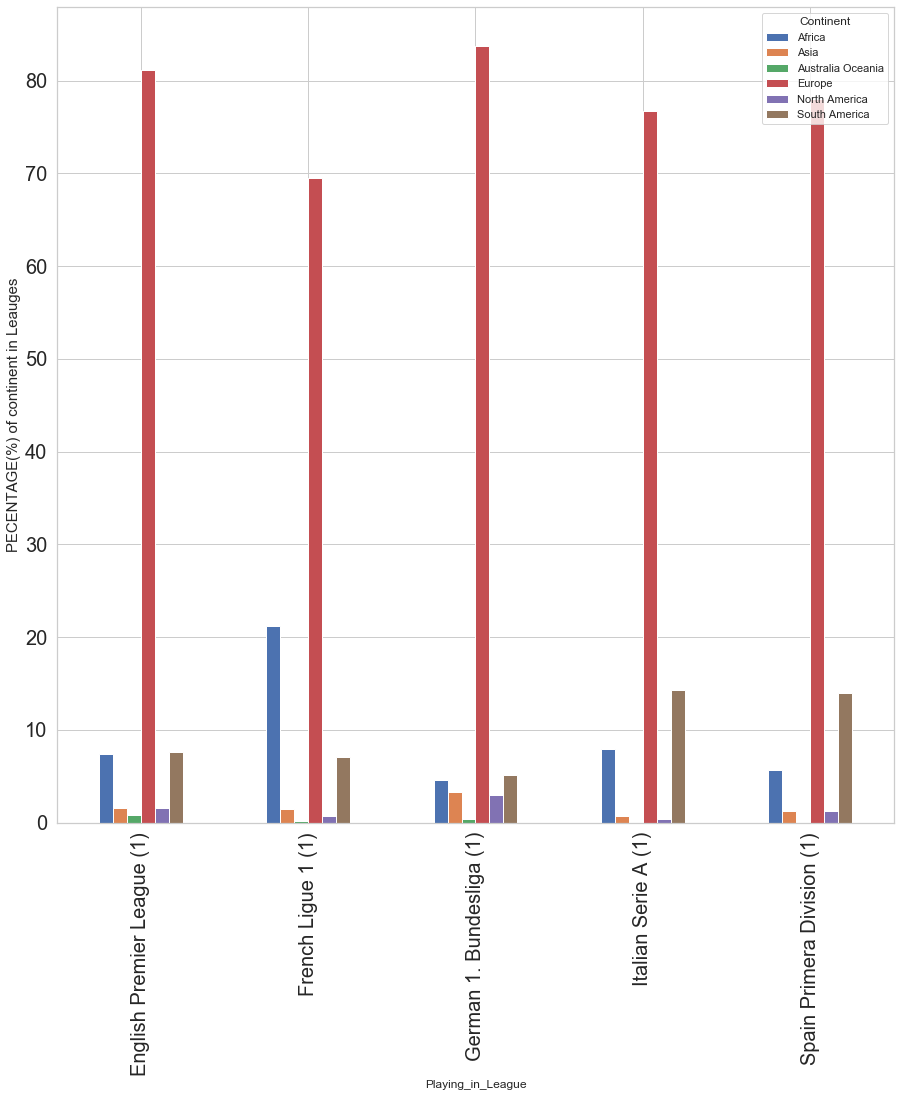

In [68]:
# the Spread of continets arcoss the top 5 leauges in europe, as expected 
legCo.plot(kind= "bar", figsize=(15,15), fontsize=20)
plt.ylabel('PECENTAGE(%) of continent in Leauges', fontsize= 15);


In [69]:
df['Playing_in_League'].unique()

array(['Spain Primera Division (1)', 'English Premier League (1)',
       'Italian Serie A (1)', 'French Ligue 1 (1)',
       'German 1. Bundesliga (1)'], dtype=object)

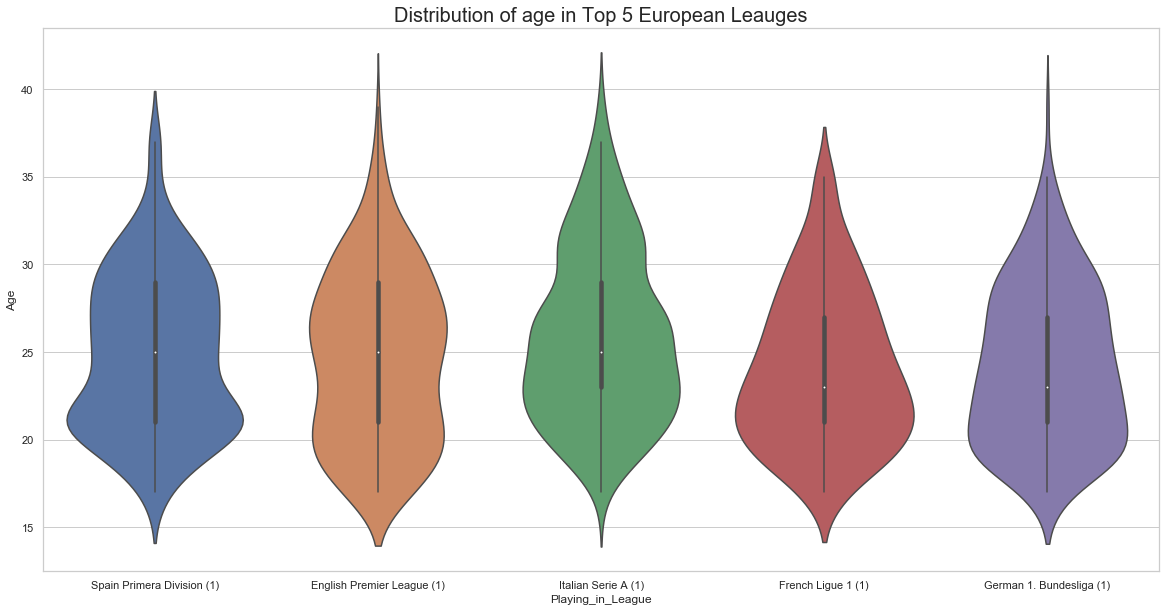

In [70]:
# Compare six clubs in relation to age
leauges = ['Spain Primera Division (1)', 'English Premier League (1)',
       'Italian Serie A (1)', 'French Ligue 1 (1)',
       'German 1. Bundesliga (1)']
df_club = df.loc[df['Playing_in_League'].isin(leauges) & df['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x='Playing_in_League', y="Age", data=df_club );
ax.set_title(label='Distribution of age in Top 5 European Leauges', fontsize=20);

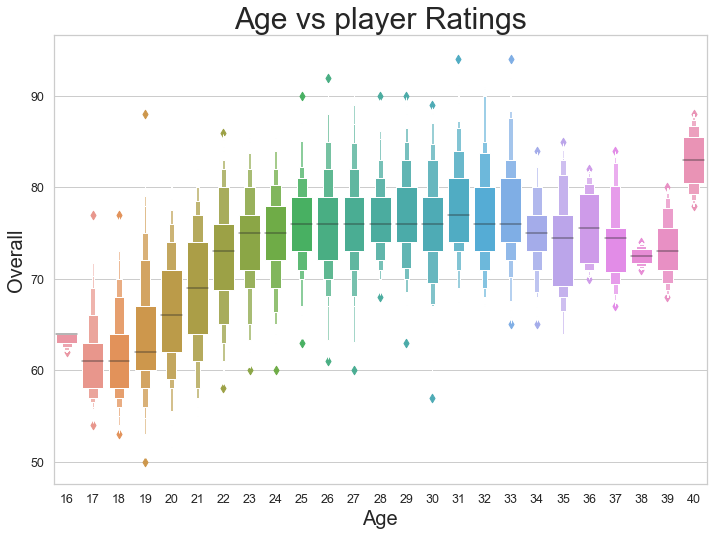

In [71]:

def sns_settings(title='', xtitle='', ytitle='', rotate = 0):
    sns.set(style='dark', palette='muted', color_codes=True)
    ax.axes.set_title(title, fontsize=30)
    ax.set_xlabel(xtitle, fontsize=20)
    ax.set_ylabel(ytitle, fontsize = 20)
    plt.yticks(fontsize='12.5') # ticks are scaling numbers
    plt.xticks(fontsize='12.5')
    a = plt.setp(ax.get_xticklabels(), rotation=rotate)

canvas = (11.7, 8.27) # A4 size    
fig, ax = plt.subplots(figsize=canvas) # hack to increase the size of figures or plots or canvas

sns_settings(title = 'Age vs player Ratings')
sns.boxenplot(data=df, x="Age", y="Overall")

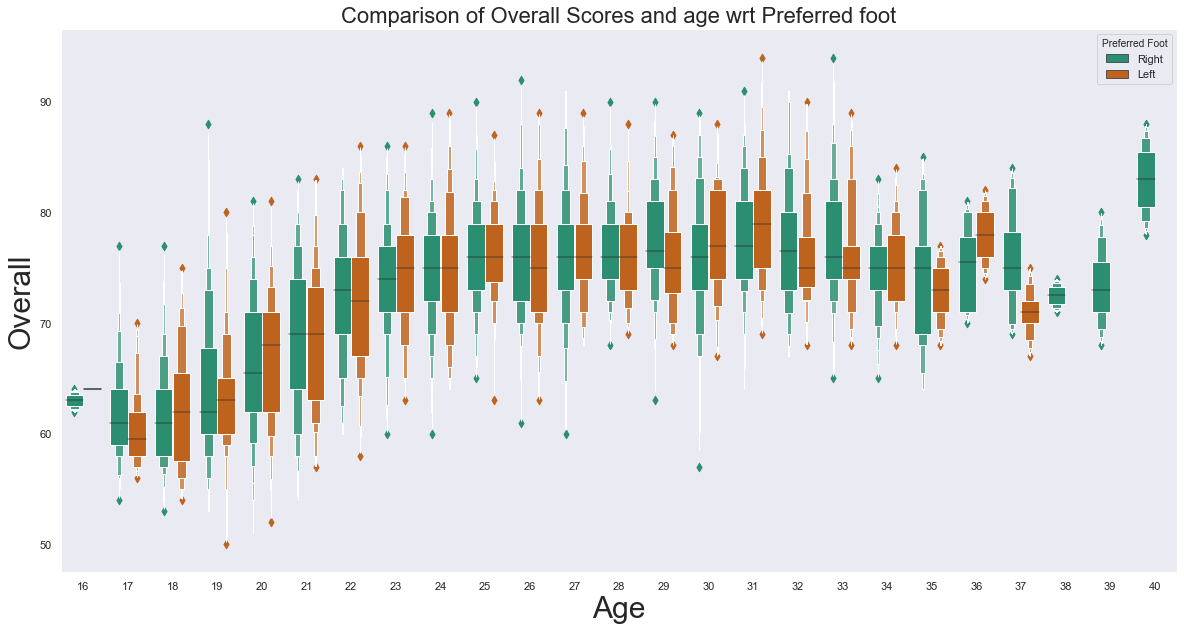

In [92]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('seaborn-dark-palette')
  
sns.boxenplot(df['Age'],df['Overall'], hue = df['Preferred Foot'], palette = 'Dark2')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 22)
plt.ylabel("Overall", fontsize=30 )
plt.xlabel("Age", fontsize=30)
plt.show()

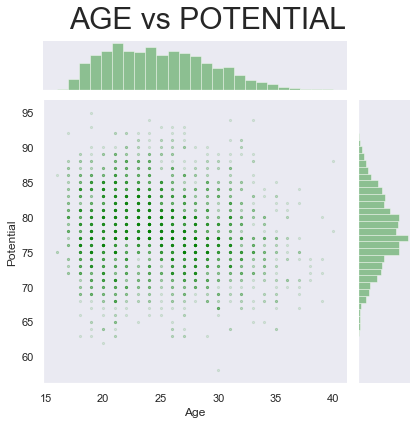

In [93]:
#visualization of age vs potential of players
g= sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'green'},
              marginal_kws={'color':'green'}, )#.set_title(title, fontsize=30)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('AGE vs POTENTIAL', fontsize=30); # can also get the figure from plt.gcf()


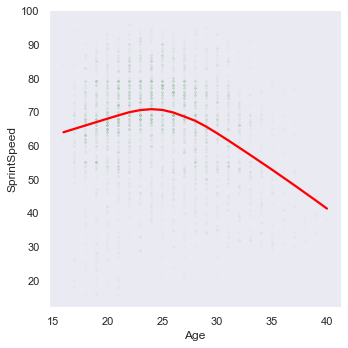

In [94]:
#visualization of age vs sprint speed
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})

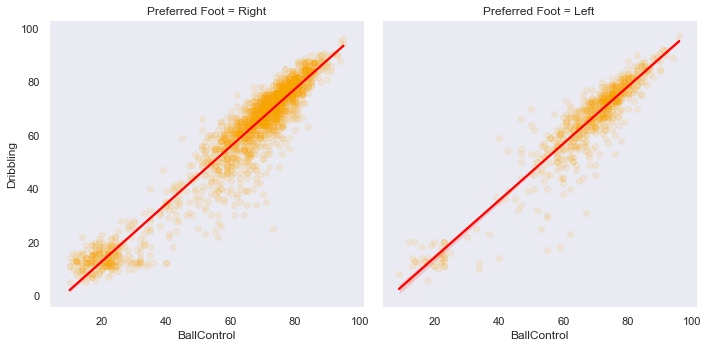

In [95]:

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})

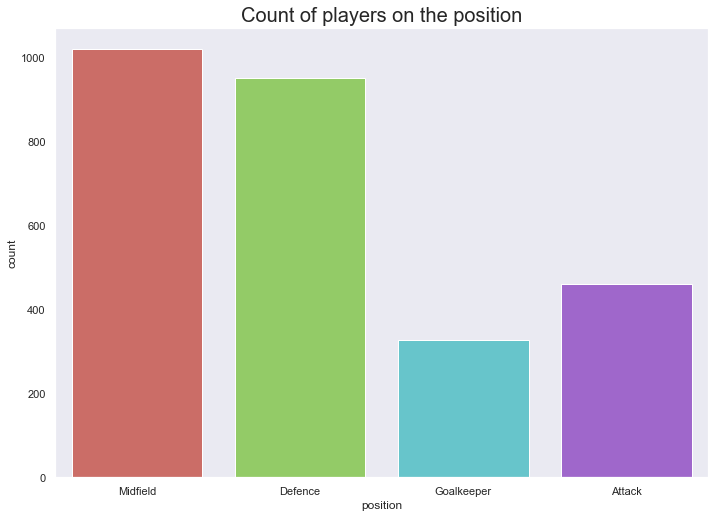

In [122]:
# All of position
fig, ax = plt.subplots(figsize=canvas)
ax = sns.countplot(x = 'position', data = df, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);


In [97]:

Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r



NameError: name 'Accent' is not defined

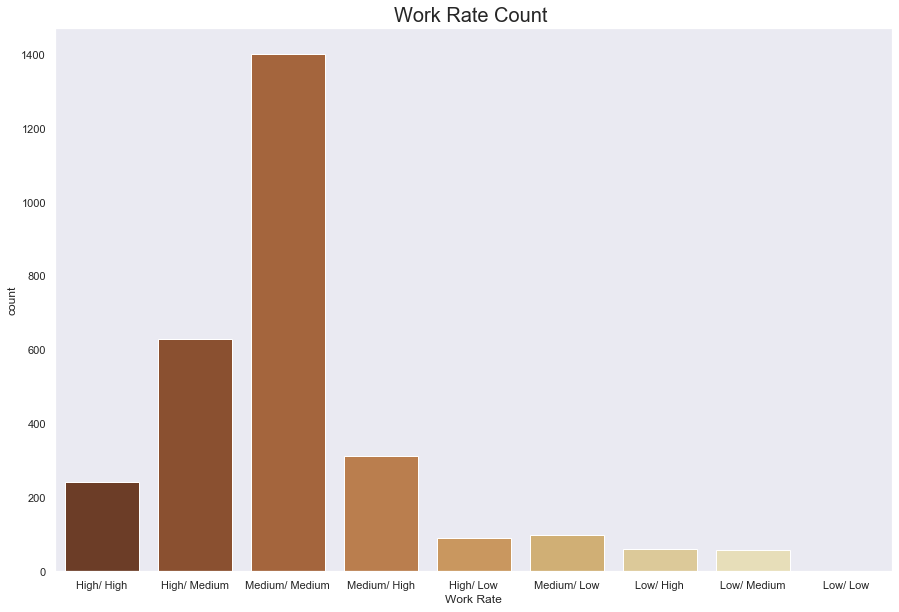

In [110]:

#work rates and its distribution in the data
fig2, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x = 'Work Rate', data = df, palette = 'YlOrBr_r', saturation=0.5,  );
ax.set_title(label='Work Rate Count ', fontsize=20);


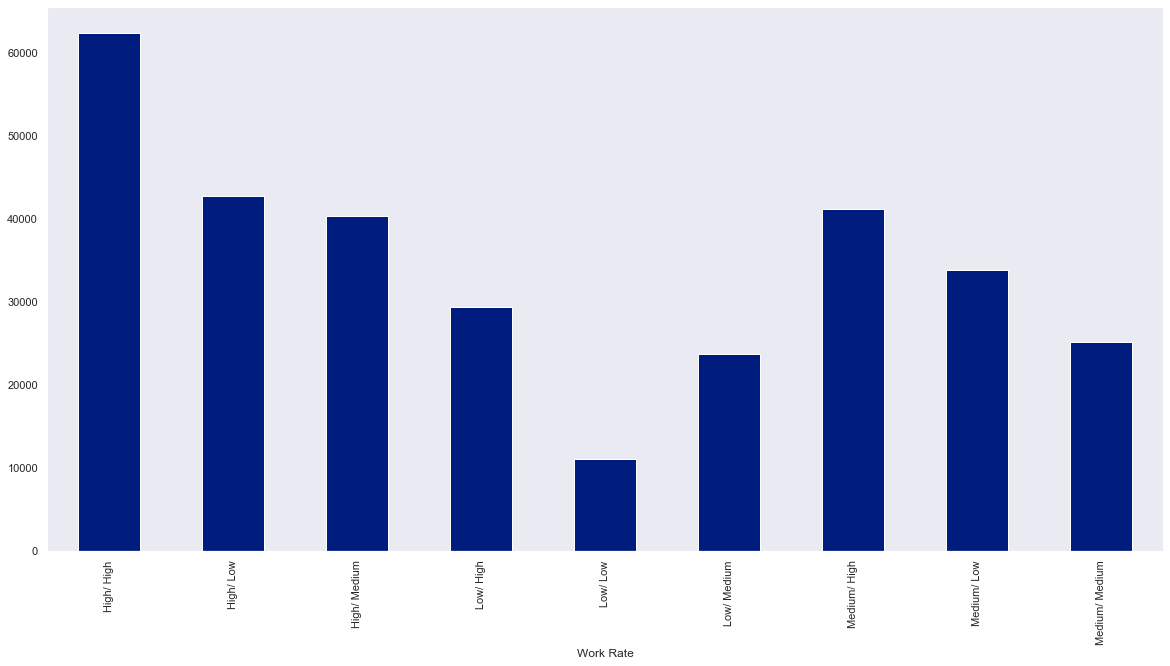

In [118]:
df.groupby('Work Rate')["Wage"].mean().plot(kind= "bar" ,x="Work Rate", y= "Wage")
# plt.rcParams['figure.figsize'] = (20, 10)
# plt.style.use('seaborn-dark-palette')
  
# sns.boxenplot(df['Work Rate'],df['Wage'], palette = 'Dark2')
# plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 22)
# plt.ylabel("Overall", fontsize=30 )
# plt.xlabel("Age", fontsize=30)
# plt.show()

This is the avarage wage earn for players in the different work rates. This shows that players that have High/high work rate, on average earn the highest.

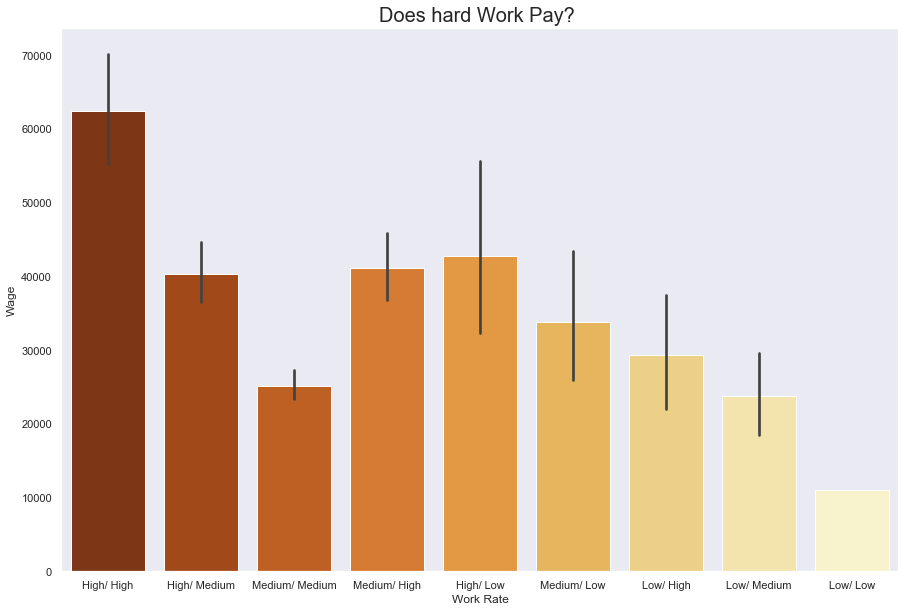

In [120]:
fig3, ax = plt.subplots(figsize=(15,10))
sns.barplot(data = df, x = 'Work Rate', y = 'Wage', palette='YlOrBr_r' )
ax.set_title(label='Does hard Work Pay? ', fontsize=20);

In [ ]:
precent

In [548]:
df[features].dtypes


Age                           int64
Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
Special                       int64
International Reputation    float64
Skill Moves                 float64
Height                       object
Weight                        int64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   float64
Balance                     float64
ShotPower                   float64
Jumping                     float64
Stamina                     

# Checking features for linear relationships

In [ ]:
df

In [605]:
features= ['Value', 'Age',
       'Overall', 'Potential', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 
       'Height',
       'Weight',
       'Jumping',  'Strength', 
       'StandingTackle', 'years_left_contract']
        

In [606]:
n = 3
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

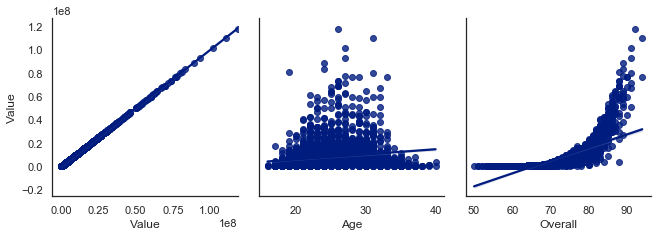

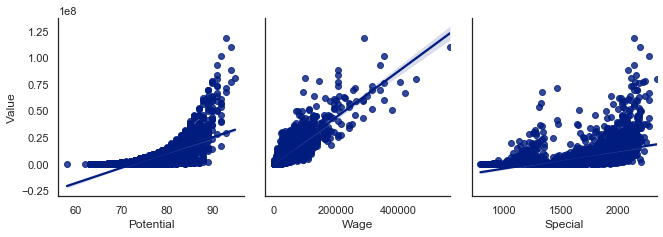

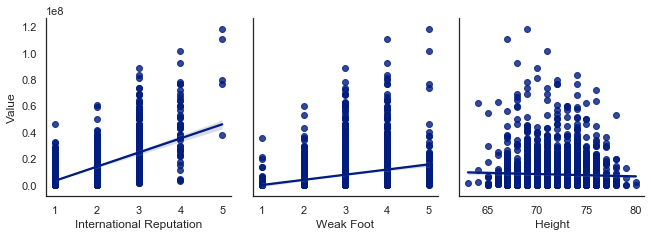

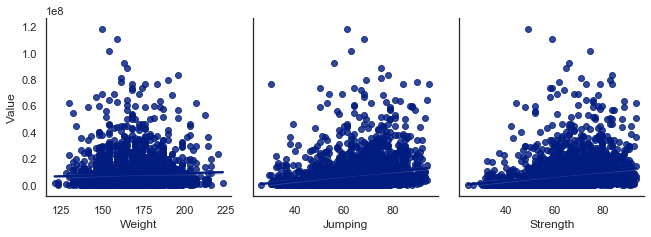

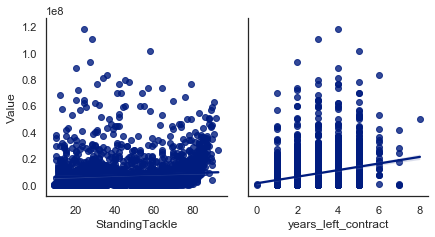

In [607]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['Value'],x_vars=i, kind="reg", height=3)

# Checking for Colinearity

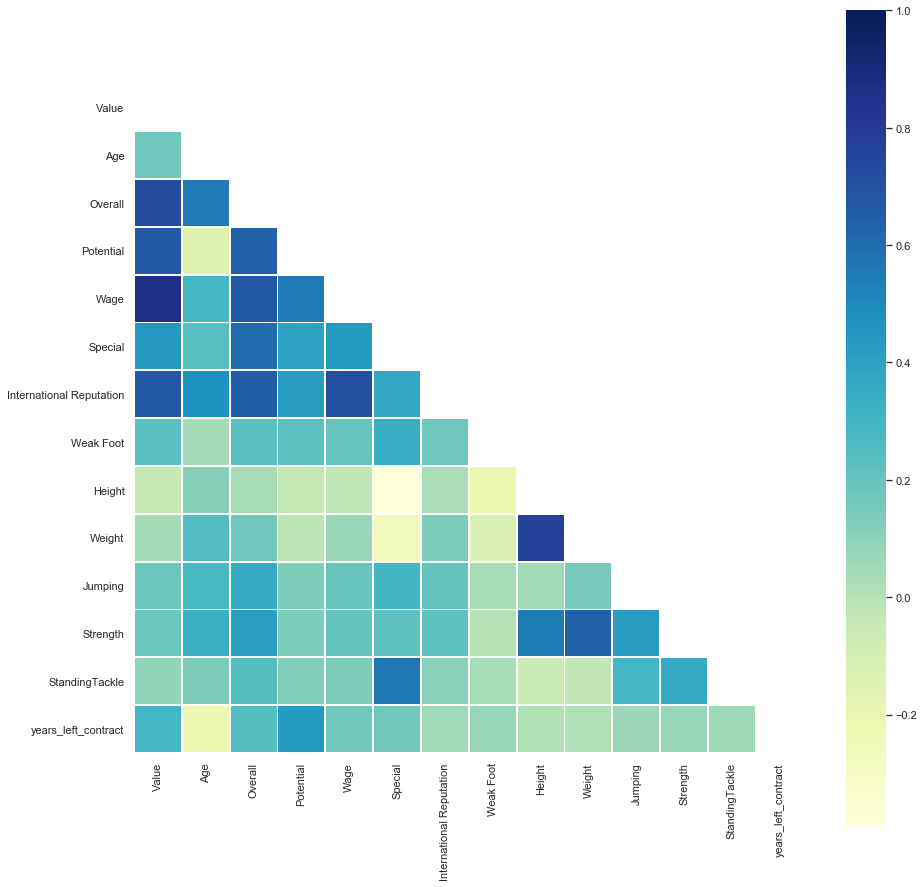

In [593]:
Corr = df_t.corr()
mask = np.zeros_like(Corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(Corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

# Creating Dummy Variables and Transforming Features with non linear relationships

In [647]:
# #selceting only the colums needed for model which includes some cateical variables (but includes value)
# features1=['Value','Club', 'Playing_in_League', 'Age', 'Nationality',
#        'Overall', 'Potential', 'Wage', 'Special',
#        'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
#        'Height',
#        'Weight', 'Crossing', 'Finishing',
#        'HeadingAccuracy','ShortPassing', 'Volleys', 'Dribbling', 'Curve',
#        'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
#        'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
#        'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
#        'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
#        'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
#        'GKKicking', 'GKPositioning', 'GKReflexes', 'years_left_contract',
#        'Continent', 'position']

In [648]:
#selceting only the colums needed for model which includes some cateical variables (but includes value)
#decided to drop some of the player attributes because of colinearity 
features_n= ['Value','Club', 'Playing_in_League', 'Age', 
       'Overall', 'Potential', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Work Rate',
       'Height',
       'Weight',
       'Jumping',  'Strength', 
       'StandingTackle', 'years_left_contract',
       'Continent', 'position']

In [649]:
df_t= df[features_n]

In [650]:
#getting dummys for 'position','Continent','Nationality','Work Rate','Playing_in_League','Club','Preferred Foot"
df_dummy = pd.get_dummies(df_t, columns=['position','Continent','Work Rate','Playing_in_League','Club'])

In [651]:
# #Dummy Variables for work rates
# # pd.get_dummies(df_t['Work Rate']).head(10)
# df_t= pd.concat([df_t, pd.get_dummies(df_t['Work Rate'])], 1)


In [652]:

df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891 entries, 0 to 8391
Columns: 135 entries, Value to Club_Wolverhampton Wanderers
dtypes: float64(7), int64(7), uint8(121)
memory usage: 760.4 KB


In [653]:
# #dummy variables for position
# pd.get_dummies(df_t['position'])
# df_t= pd.concat([df_t, pd.get_dummies(df_t['position'])], 1)


In [654]:
# #dummy Variables for continent 
# pd.get_dummies(df_t['Continent']).head(10)
# df_t= pd.concat([df_t, pd.get_dummies(df_t['Continent'])], 1)


In [655]:
# #Dummy varribales for 'Body Type'
# pd.get_dummies(df_t['Body Type']).head(10)
# df_t= pd.concat([df_t, pd.get_dummies(df_t['Body Type'])], 1)


In [656]:
# #dummy varribales for 'Nationality'
# pd.get_dummies(df_t['Nationality'])
# df_t= pd.concat([df_t, pd.get_dummies(df_t['Nationality'])], 1)


In [657]:
# #dummy varribles for 'Playing_in_League'
# pd.get_dummies(df_t['Playing_in_League'])
# df_t= pd.concat([df_t, pd.get_dummies(df_t['Playing_in_League'])], 1)


In [658]:
# #dummy varribales for clubs
# pd.get_dummies(df_t['Club'])
# df_t= pd.concat([df_t, pd.get_dummies(df_t['Club'])], 1)


In [659]:
# #dummy varrible for prefered foot
# pd.get_dummies(df_t['Preferred Foot'])
# df_t= pd.concat([df_t, pd.get_dummies(df_t['Preferred Foot'])], 1)

In [660]:
# #select features without the categorical variables because dummy varribles already present(including the target VAR
# #'Value')
# feature2= ['Value', 'Age',
#        'Overall', 'Potential', 'Wage', 'Special',
#        'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
#        'Weight', 'Crossing', 'Finishing',
#        'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
#        'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
#        'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
#        'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
#        'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
#        'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
#        'GKKicking', 'GKPositioning', 'GKReflexes', 'years_left_contract']

In [661]:
#DATAFRAME with Categorical varriables transformed to dummy
df4=df_dummy

In [662]:
x2= (df['Overall']).apply(lambda x:np.power(x,9))

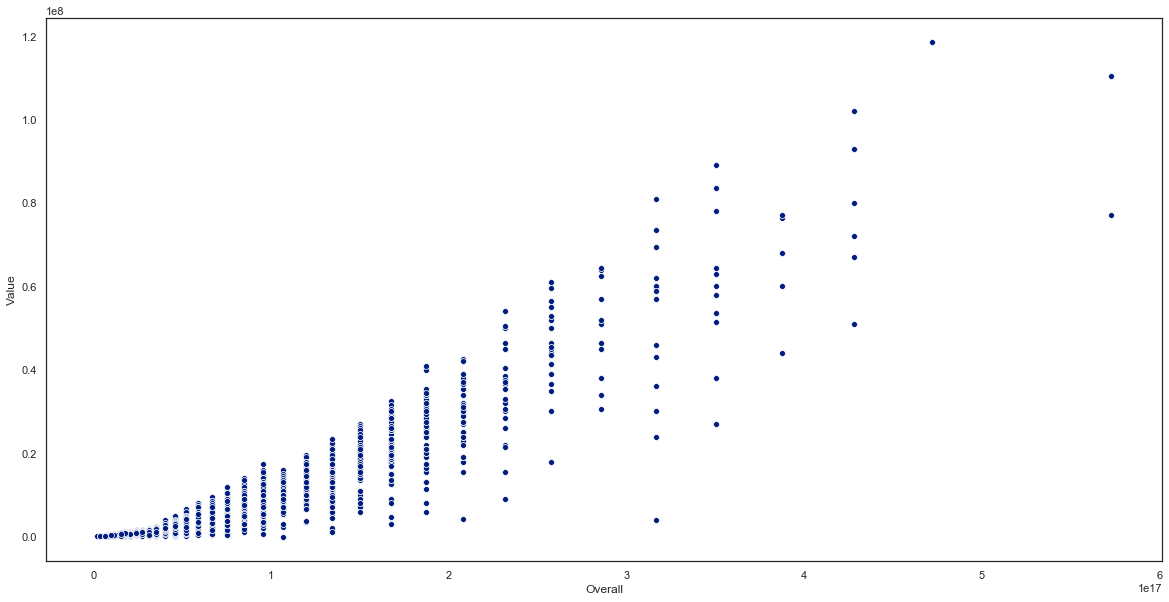

In [663]:
 pp2 = sns.scatterplot(data=df, y=df['Value'], x= x2)

# Train Test Split

In [664]:
df4

,Value,Age,Overall,Potential,Wage,Special,International Reputation,Weak Foot,Height,Weight,Jumping,Strength,StandingTackle,years_left_contract,position_Attack,position_Defence,position_Goalkeeper,position_Midfield,Continent_Africa,Continent_Asia,Continent_Australia Oceania,Continent_Europe,Continent_North America,Continent_South America,Work Rate_High/ High,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium,Playing_in_League_English Premier League (1),Playing_in_League_French Ligue 1 (1),Playing_in_League_German 1. Bundesliga (1),Playing_in_League_Italian Serie A (1),Playing_in_League_Spain Primera Division (1),Club_1. FC Nürnberg,Club_1. FSV Mainz 05,Club_AS Monaco,Club_AS Saint-Étienne,Club_Amiens SC,Club_Angers SCO,Club_Arsenal,Club_Atalanta,Club_Athletic Club de Bilbao,Club_Atlético Madrid,Club_Bayer 04 Leverkusen,Club_Bologna,...,Club_LOSC Lille,Club_Lazio,Club_Leicester City,Club_Levante UD,Club_Liverpool,Club_Manchester City,Club_Manchester United,Club_Milan,Club_Montpellier HSC,Club_Napoli,Club_Newcastle United,Club_Nîmes Olympique,Club_OGC Nice,Club_Olympique Lyonnais,Club_Olympique de Marseille,Club_Paris Saint-Germain,Club_Parma,Club_RB Leipzig,Club_RC Strasbourg Alsace,Club_RCD Espanyol,Club_Rayo Vallecano,Club_Real Betis,Club_Real Madrid,Club_Real Sociedad,Club_Real Valladolid CF,Club_Roma,Club_SC Freiburg,Club_SD Eibar,Club_SD Huesca,Club_SPAL,Club_SV Werder Bremen,Club_Sampdoria,Club_Sassuolo,Club_Sevilla FC,Club_Southampton,Club_Stade Malherbe Caen,Club_Stade Rennais FC,Club_Stade de Reims,Club_TSG 1899 Hoffenheim,Club_Torino,Club_Tottenham Hotspur,Club_Toulouse Football Club,Club_Udinese,Club_Valencia CF,Club_VfB Stuttgart,Club_VfL Wolfsburg,Club_Villarreal CF,Club_Watford,Club_West Ham United,Club_Wolverhampton Wanderers
0,67000000.0,32,91,91,420000.0,2280,4.0,4.0,68,146,68.0,58.0,76.0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51000000.0,32,91,91,380000.0,2201,4.0,3.0,72,181,93.0,83.0,92.0,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,76500000.0,28,90,90,355000.0,2190,4.0,5.0,72,168,30.0,73.0,79.0,4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,53500000.0,26,89,90,240000.0,1311,4.0,2.0,78,212,68.0,70.0,18.0,6,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,59500000.0,26,88,90,285000.0,2170,3.0,3.0,73,185,88.0,89.0,90.0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,975000.0,19,64,80,6000.0,1464,1.0,3.0,74,159,65.0,66.0,19.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8388,650000.0,21,63,75,2000.0,1655,1.0,2.0,74,176,41.0,65.0,62.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [665]:
# df4.drop(columns= ['Club','position', 'Preferred Foot','Playing_in_League','Nationality','Body Type', 'Continent','Work Rate'], inplace= False) #'position', 'Preferred Foot','Playing_in_League','Nationality','Body Type', 'Continent'

In [666]:
#asign traget column to a variable
target =df4['Value']

In [667]:
#drop Target Varibale
df4 =df4.drop(columns=['Value'], inplace= False)

In [668]:
# type(Y), type(X)

In [669]:
X_train, X_test, y_train, y_test = train_test_split(df4, target, random_state=22,test_size=0.2)

In [670]:
X_train.head()

,Age,Overall,Potential,Wage,Special,International Reputation,Weak Foot,Height,Weight,Jumping,Strength,StandingTackle,years_left_contract,position_Attack,position_Defence,position_Goalkeeper,position_Midfield,Continent_Africa,Continent_Asia,Continent_Australia Oceania,Continent_Europe,Continent_North America,Continent_South America,Work Rate_High/ High,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium,Playing_in_League_English Premier League (1),Playing_in_League_French Ligue 1 (1),Playing_in_League_German 1. Bundesliga (1),Playing_in_League_Italian Serie A (1),Playing_in_League_Spain Primera Division (1),Club_1. FC Nürnberg,Club_1. FSV Mainz 05,Club_AS Monaco,Club_AS Saint-Étienne,Club_Amiens SC,Club_Angers SCO,Club_Arsenal,Club_Atalanta,Club_Athletic Club de Bilbao,Club_Atlético Madrid,Club_Bayer 04 Leverkusen,Club_Bologna,Club_Borussia Dortmund,...,Club_LOSC Lille,Club_Lazio,Club_Leicester City,Club_Levante UD,Club_Liverpool,Club_Manchester City,Club_Manchester United,Club_Milan,Club_Montpellier HSC,Club_Napoli,Club_Newcastle United,Club_Nîmes Olympique,Club_OGC Nice,Club_Olympique Lyonnais,Club_Olympique de Marseille,Club_Paris Saint-Germain,Club_Parma,Club_RB Leipzig,Club_RC Strasbourg Alsace,Club_RCD Espanyol,Club_Rayo Vallecano,Club_Real Betis,Club_Real Madrid,Club_Real Sociedad,Club_Real Valladolid CF,Club_Roma,Club_SC Freiburg,Club_SD Eibar,Club_SD Huesca,Club_SPAL,Club_SV Werder Bremen,Club_Sampdoria,Club_Sassuolo,Club_Sevilla FC,Club_Southampton,Club_Stade Malherbe Caen,Club_Stade Rennais FC,Club_Stade de Reims,Club_TSG 1899 Hoffenheim,Club_Torino,Club_Tottenham Hotspur,Club_Toulouse Football Club,Club_Udinese,Club_Valencia CF,Club_VfB Stuttgart,Club_VfL Wolfsburg,Club_Villarreal CF,Club_Watford,Club_West Ham United,Club_Wolverhampton Wanderers
4888,25,73,77,10000.0,1858,1.0,4.0,69,146,76.0,70.0,31.0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4521,30,77,77,21000.0,2073,1.0,4.0,71,174,63.0,71.0,65.0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
526,24,81,84,54000.0,2107,2.0,4.0,70,170,75.0,76.0,55.0,4,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1714,21,75,85,19000.0,1892,1.0,3.0,72,163,54.0,58.0,59.0,4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75,27,82,82,130000.0,2175,3.0,3.0,69,152,80.0,72.0,75.0,3,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Scalar transformation

In [671]:
#transform to scalar

scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df4.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df4.columns)

In [672]:
X_train.head()

,Age,Overall,Potential,Wage,Special,International Reputation,Weak Foot,Height,Weight,Jumping,Strength,StandingTackle,years_left_contract,position_Attack,position_Defence,position_Goalkeeper,position_Midfield,Continent_Africa,Continent_Asia,Continent_Australia Oceania,Continent_Europe,Continent_North America,Continent_South America,Work Rate_High/ High,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium,Playing_in_League_English Premier League (1),Playing_in_League_French Ligue 1 (1),Playing_in_League_German 1. Bundesliga (1),Playing_in_League_Italian Serie A (1),Playing_in_League_Spain Primera Division (1),Club_1. FC Nürnberg,Club_1. FSV Mainz 05,Club_AS Monaco,Club_AS Saint-Étienne,Club_Amiens SC,Club_Angers SCO,Club_Arsenal,Club_Atalanta,Club_Athletic Club de Bilbao,Club_Atlético Madrid,Club_Bayer 04 Leverkusen,Club_Bologna,Club_Borussia Dortmund,...,Club_LOSC Lille,Club_Lazio,Club_Leicester City,Club_Levante UD,Club_Liverpool,Club_Manchester City,Club_Manchester United,Club_Milan,Club_Montpellier HSC,Club_Napoli,Club_Newcastle United,Club_Nîmes Olympique,Club_OGC Nice,Club_Olympique Lyonnais,Club_Olympique de Marseille,Club_Paris Saint-Germain,Club_Parma,Club_RB Leipzig,Club_RC Strasbourg Alsace,Club_RCD Espanyol,Club_Rayo Vallecano,Club_Real Betis,Club_Real Madrid,Club_Real Sociedad,Club_Real Valladolid CF,Club_Roma,Club_SC Freiburg,Club_SD Eibar,Club_SD Huesca,Club_SPAL,Club_SV Werder Bremen,Club_Sampdoria,Club_Sassuolo,Club_Sevilla FC,Club_Southampton,Club_Stade Malherbe Caen,Club_Stade Rennais FC,Club_Stade de Reims,Club_TSG 1899 Hoffenheim,Club_Torino,Club_Tottenham Hotspur,Club_Toulouse Football Club,Club_Udinese,Club_Valencia CF,Club_VfB Stuttgart,Club_VfL Wolfsburg,Club_Villarreal CF,Club_Watford,Club_West Ham United,Club_Wolverhampton Wanderers
0,0.046751,0.041773,-0.197171,-0.538014,0.449728,-0.633834,1.358352,-1.054906,-1.400781,0.811982,0.247416,-0.874468,-1.211252,2.261947,-0.686103,-0.361334,-0.739948,-0.324288,-0.122169,-0.051009,-1.863318,-0.110721,3.030680,-0.307729,-0.175392,1.867972,-0.139285,-0.020802,-0.12927,-0.343494,-0.188092,-0.971008,-0.527308,-0.504457,-0.480043,-0.475947,1.953629,-0.098015,-0.102418,-0.108702,-0.091028,-0.104553,-0.110721,-0.108702,-0.088581,-0.110721,-0.108702,-0.095741,-0.104553,-0.112706,...,-0.095741,-0.114658,-0.102418,-0.110721,-0.104553,-0.110721,-0.106647,-0.10024,-0.102418,-0.095741,-0.108702,-0.102418,-0.098015,-0.098015,-0.106647,-0.10024,-0.095741,-0.088581,-0.10024,-0.102418,-0.108702,-0.091028,-0.110721,-0.088581,-0.104553,-0.091028,-0.098015,-0.102418,-0.104553,-0.098015,-0.10024,-0.088581,-0.10024,-0.102418,-0.106647,-0.095741,-0.098015,-0.10024,-0.106647,-0.086066,-0.106647,-0.102418,-0.098015,-0.110721,-0.098015,-0.108702,-0.108702,-0.102418,-0.102418,-0.102418
1,1.142979,0.586646,-0.197171,-0.296738,1.165555,-0.633834,1.358352,-0.285645,0.375570,-0.286350,0.329064,0.522491,-0.465271,-0.442097,-0.686103,-0.361334,1.351446,-0.324288,-0.122169,-0.051009,-1.863318,-0.110721,3.030680,-0.307729,-0.175392,-0.535340,-0.139285,-0.020802,-0.12927,-0.343494,-0.188092,1.029857,-0.527308,-0.504457,-0.480043,-0.475947,1.953629,-0.098015,-0.102418,-0.108702,-0.091028,-0.104553,-0.110721,-0.108702,-0.088581,-0.110721,-0.108702,-0.095741,-0.104553,-0.112706,...,-0.095741,-0.114658,-0.102418,-0.110721,-0.104553,-0.110721,-0.106647,-0.10024,-0.102418,-0.095741,-0.108702,-0.102418,-0.098015,-0.098015,-0.106647,-0.10024,-0.095741,-0.088581,-0.10024,-0.102418,9.199436,-0.091028,-0.110721,-0.088581,-0.104553,-0.091028,-0.098015,-0.102418,-0.104553,-0.098015,-0.10024,-0.088581,-0.10024,-0.102418,-0.106647,-0.095741,-0.098015,-0.10024,-0.106647,-0.086066,-0.106647,-0.102418,-0.098015,-0.110721,-0.098015,-0.108702,-0.108702,-0.102418,-0.102418,-0.102418
2,-0.172495,1.131520,1.107949,0.427091,1.278755,0.760480,1.358352,-0.670276,0.121806,0.727495,0.737304,0.111621,1.0

# MODELLING

In [674]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# building a linear regression model using statsmodel 
# lr_model = ols(formula='X_train ~y_train', data=scaler2.transform(X_train)).fit()

# lr_model.summary()
#X_train.convert_objects(convert_numeric=True)

X= sm.add_constant(X_train)
Y= y_train.values.reshape(-1,1)
lr_model=sm.OLS(Y,X).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     119.6
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:13:28   Log-Likelihood:                -38468.
No. Observations:                2312   AIC:                         7.719e+04
Df Residuals:                    2184   BIC:                         7.793e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         8.216e+06   8.71e+04     94.308      0.000    8.05e+06    8.39e+06
Age                                            -2.9e+06   2.04e+05    -14.224      0.000    -3.3e+06    -2.5e+06
Overall                                       3.709e+06   3.22e+05     11.514      0.000    3.08e+06    4.34e+06
Potential                                     3.359e+05    2.2e+05      1.525      0.127   -9.59e+04    7.68e+05
Wage                                          8.664e+06   1.87e+05     46.289      0.000     8.3e+06    9.03e+06
Special                                      -8.299e+05   3.12e+05     -2.664      0.008   -1.44e+06   -2.19e+05
International Reputation                      1.241e+06   1.54e+05      8.043      0.000    9.39e+05    1.54e+06
Weak Foot                                     1.727e+05      1e+05      1.724      0.085   -2.37e+04    3.69e+05
Height                                        -1.45e+05   1.62e+05     -0.894      0.372   -4.63e+05    1.73e+05
Weight                                        -1.16e+05   1.71e+05     -0.680      0.497   -4.51e+05    2.19e+05
Jumping                                       5.889e+04   1.09e+05      0.539      0.590   -1.55e+05    2.73e+05
Strength                                      1.393e+05   1.67e+05      0.832      0.405   -1.89e+05    4.68e+05
StandingTackle                               -5.032e+05   2.11e+05     -2.388      0.017   -9.16e+05      -9e+04
years_left_contract                            5.67e+05   1.05e+05      5.419      0.000    3.62e+05    7.72e+05
position_Attack                              -7.667e+05   1.81e+05     -4.247      0.000   -1.12e+06   -4.13e+05
position_Defence                              -7.43e+05   2.44e+05     -3.050      0.002   -1.22e+06   -2.65e+05
position_Goalkeeper                          -5.889e+05    2.5e+05     -2.356      0.019   -1.08e+06   -9.88e+04
position_Midfield                            -4.245e+05   2.21e+05     -1.922      0.055   -8.58e+05    8561.880
Continent_Africa                             -1.554e+06   8.95e+05     -1.738      0.082   -3.31e+06       2e+05
Continent_Asia                               -6.336e+05   3.76e+05     -1.684      0.092   -1.37e+06    1.04e+05
Continent_Australia Oceania                  -2.467e+05   1.78e+05     -1.388      0.165   -5.95e+05    1.02e+05
Continent_Europe                             -2.074e+06   1.27e+06     -1.638      0.102   -4.56e+06    4.09e+05
Continent_North America                      -6.003e+05   3.44e+05     -1.746      0.081   -1.27e+06     7.4e+04
Continent_South America                      -1.542e+06   9.08e+05     -1.698      0.090   -3.32e+06    2.39e+05
Work Rate_High/ High            

In [675]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 4072982.8934635418


In [676]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8742180763128526

In [677]:
type(y_train),  type(y_train_pred)

(pandas.core.series.Series, numpy.ndarray)

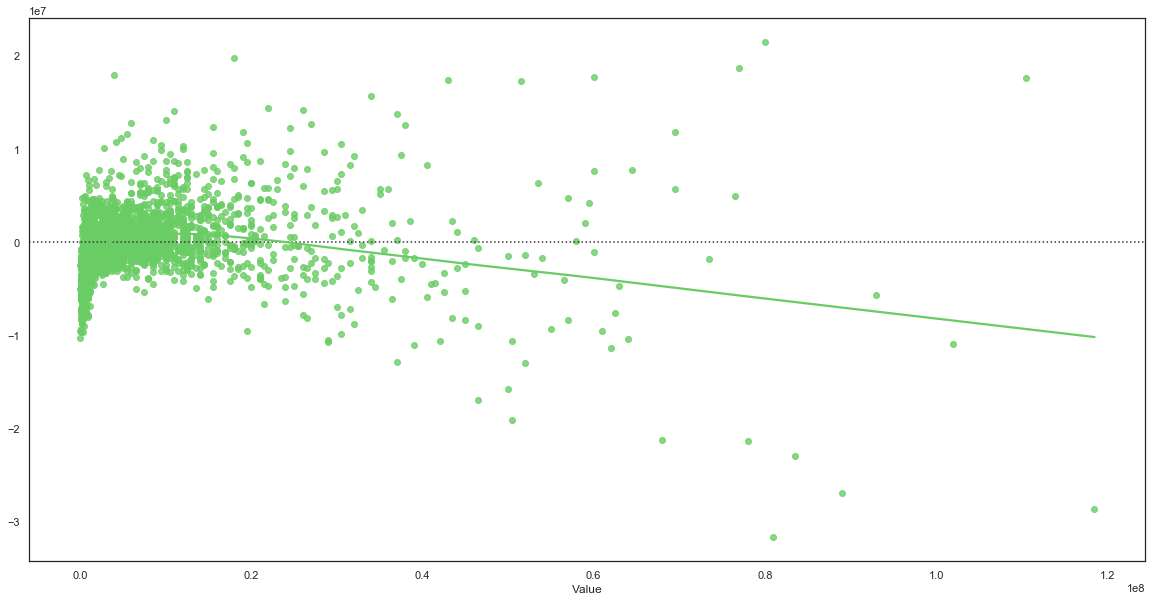

In [678]:
sns.residplot(y_train, y_train_pred,lowess=True, color="g")

# Testing

In [680]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 4255650.804983194
Training:  4072982 vs. Testing:  4255650


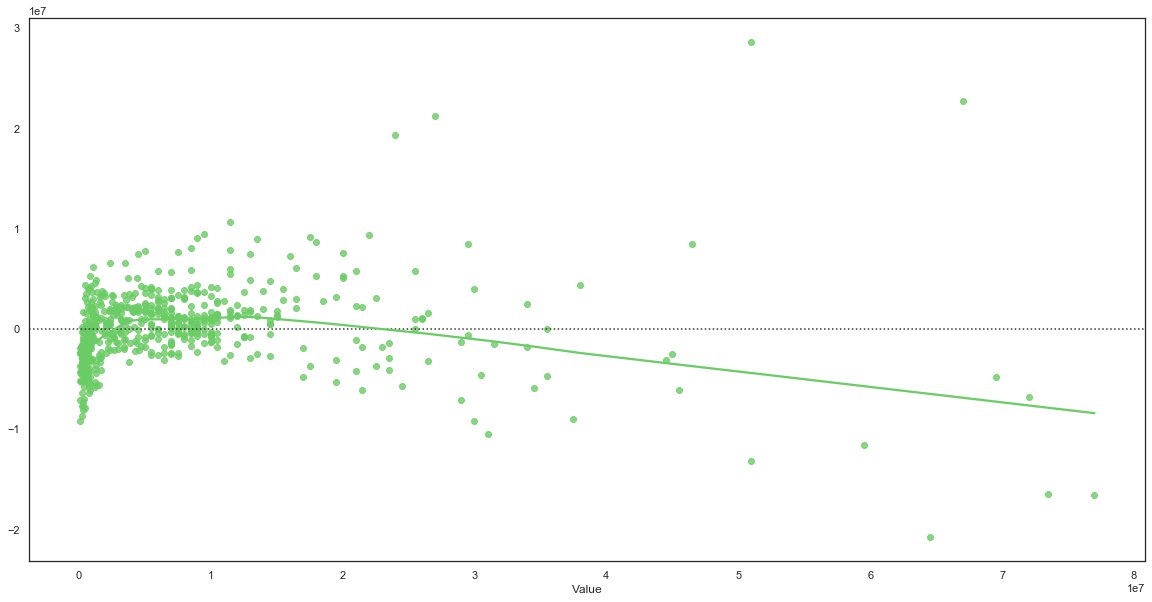

In [681]:
sns.residplot(y_test, y_pred,lowess=True, color="g")

# LASSO 

In [683]:
#LASSO
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y2_train_pred = lasso.predict(X_train)
y2_pred = lasso.predict(X_test)

trainLASS_rmse = metrics.mean_absolute_error(y_train, y2_train_pred)
testLASS_rmse = np.sqrt(metrics.mean_squared_error(y_test, y2_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )


Training Error: 4072982.8934635418
Testing Error: 4255650.804983194


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9159069488281388e+16, tolerance: 30492621950376.3
  positive)


In [684]:
r2_score(y_train, y2_train_pred)

0.8743061464168402

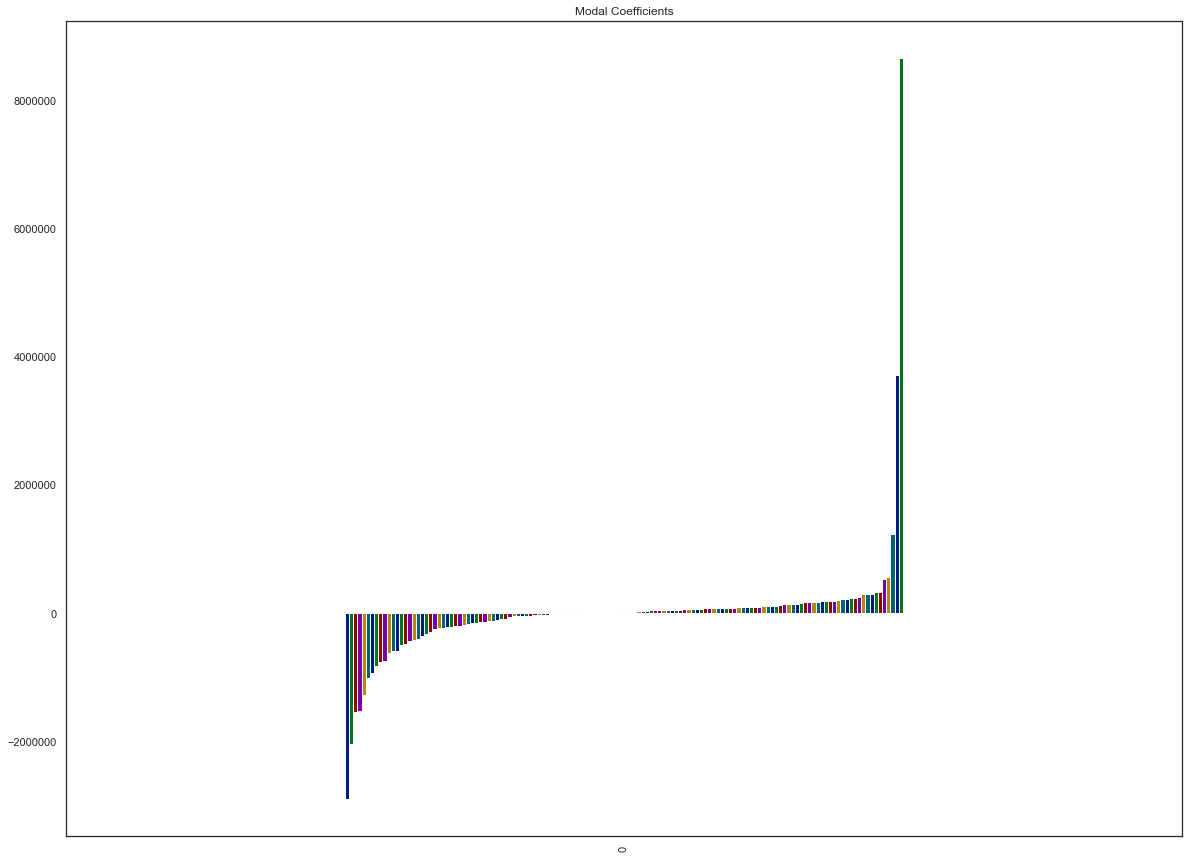

In [685]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(20,15))

# Different strokes for Different folks


# Model for Out-Field Players

In [686]:
df_dummy.head()


,Value,Age,Overall,Potential,Wage,Special,International Reputation,Weak Foot,Height,Weight,Jumping,Strength,StandingTackle,years_left_contract,position_Attack,position_Defence,position_Goalkeeper,position_Midfield,Continent_Africa,Continent_Asia,Continent_Australia Oceania,Continent_Europe,Continent_North America,Continent_South America,Work Rate_High/ High,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium,Playing_in_League_English Premier League (1),Playing_in_League_French Ligue 1 (1),Playing_in_League_German 1. Bundesliga (1),Playing_in_League_Italian Serie A (1),Playing_in_League_Spain Primera Division (1),Club_1. FC Nürnberg,Club_1. FSV Mainz 05,Club_AS Monaco,Club_AS Saint-Étienne,Club_Amiens SC,Club_Angers SCO,Club_Arsenal,Club_Atalanta,Club_Athletic Club de Bilbao,Club_Atlético Madrid,Club_Bayer 04 Leverkusen,Club_Bologna,...,Club_LOSC Lille,Club_Lazio,Club_Leicester City,Club_Levante UD,Club_Liverpool,Club_Manchester City,Club_Manchester United,Club_Milan,Club_Montpellier HSC,Club_Napoli,Club_Newcastle United,Club_Nîmes Olympique,Club_OGC Nice,Club_Olympique Lyonnais,Club_Olympique de Marseille,Club_Paris Saint-Germain,Club_Parma,Club_RB Leipzig,Club_RC Strasbourg Alsace,Club_RCD Espanyol,Club_Rayo Vallecano,Club_Real Betis,Club_Real Madrid,Club_Real Sociedad,Club_Real Valladolid CF,Club_Roma,Club_SC Freiburg,Club_SD Eibar,Club_SD Huesca,Club_SPAL,Club_SV Werder Bremen,Club_Sampdoria,Club_Sassuolo,Club_Sevilla FC,Club_Southampton,Club_Stade Malherbe Caen,Club_Stade Rennais FC,Club_Stade de Reims,Club_TSG 1899 Hoffenheim,Club_Torino,Club_Tottenham Hotspur,Club_Toulouse Football Club,Club_Udinese,Club_Valencia CF,Club_VfB Stuttgart,Club_VfL Wolfsburg,Club_Villarreal CF,Club_Watford,Club_West Ham United,Club_Wolverhampton Wanderers
0,67000000.0,32,91,91,420000.0,2280,4.0,4.0,68,146,68.0,58.0,76.0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51000000.0,32,91,91,380000.0,2201,4.0,3.0,72,181,93.0,83.0,92.0,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,76500000.0,28,90,90,355000.0,2190,4.0,5.0,72,168,30.0,73.0,79.0,4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,53500000.0,26,89,90,240000.0,1311,4.0,2.0,78,212,68.0,70.0,18.0,6,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,59500000.0,26,88,90,285000.0,2170,3.0,3.0,73,185,88.0,89.0,90.0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [687]:
#first getting a data set with just outfield Players
df_OF= df_dummy[df_dummy['position_Goalkeeper']==0]

In [704]:
# #This is the data frame for the outfield players, dropping GK stats
# df_OF= df_OF.drop(columns=['GKKicking', 'GKDiving', 'GKPositioning','GKReflexes'], inplace=False)

In [691]:
df_OF.head()

,Value,Age,Overall,Potential,Wage,Special,International Reputation,Weak Foot,Height,Weight,Jumping,Strength,StandingTackle,years_left_contract,position_Attack,position_Defence,position_Goalkeeper,position_Midfield,Continent_Africa,Continent_Asia,Continent_Australia Oceania,Continent_Europe,Continent_North America,Continent_South America,Work Rate_High/ High,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium,Playing_in_League_English Premier League (1),Playing_in_League_French Ligue 1 (1),Playing_in_League_German 1. Bundesliga (1),Playing_in_League_Italian Serie A (1),Playing_in_League_Spain Primera Division (1),Club_1. FC Nürnberg,Club_1. FSV Mainz 05,Club_AS Monaco,Club_AS Saint-Étienne,Club_Amiens SC,Club_Angers SCO,Club_Arsenal,Club_Atalanta,Club_Athletic Club de Bilbao,Club_Atlético Madrid,Club_Bayer 04 Leverkusen,Club_Bologna,...,Club_LOSC Lille,Club_Lazio,Club_Leicester City,Club_Levante UD,Club_Liverpool,Club_Manchester City,Club_Manchester United,Club_Milan,Club_Montpellier HSC,Club_Napoli,Club_Newcastle United,Club_Nîmes Olympique,Club_OGC Nice,Club_Olympique Lyonnais,Club_Olympique de Marseille,Club_Paris Saint-Germain,Club_Parma,Club_RB Leipzig,Club_RC Strasbourg Alsace,Club_RCD Espanyol,Club_Rayo Vallecano,Club_Real Betis,Club_Real Madrid,Club_Real Sociedad,Club_Real Valladolid CF,Club_Roma,Club_SC Freiburg,Club_SD Eibar,Club_SD Huesca,Club_SPAL,Club_SV Werder Bremen,Club_Sampdoria,Club_Sassuolo,Club_Sevilla FC,Club_Southampton,Club_Stade Malherbe Caen,Club_Stade Rennais FC,Club_Stade de Reims,Club_TSG 1899 Hoffenheim,Club_Torino,Club_Tottenham Hotspur,Club_Toulouse Football Club,Club_Udinese,Club_Valencia CF,Club_VfB Stuttgart,Club_VfL Wolfsburg,Club_Villarreal CF,Club_Watford,Club_West Ham United,Club_Wolverhampton Wanderers
0,67000000.0,32,91,91,420000.0,2280,4.0,4.0,68,146,68.0,58.0,76.0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51000000.0,32,91,91,380000.0,2201,4.0,3.0,72,181,93.0,83.0,92.0,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,76500000.0,28,90,90,355000.0,2190,4.0,5.0,72,168,30.0,73.0,79.0,4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,59500000.0,26,88,90,285000.0,2170,3.0,3.0,73,185,88.0,89.0,90.0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,73500000.0,26,88,91,315000.0,2137,3.0,3.0,69,174,64.0,59.0,64.0,4,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [692]:
#get target column
target_of= df_OF['Value']

In [693]:
#drop target column
df_OF= df_OF.drop(columns=['Value'], inplace=False)

In [694]:
corr= df_OF.corr()

# Split and Scale

In [695]:
Xof_train, Xof_test, yof_train, yof_test = train_test_split(df_OF, target_of, random_state=22,test_size=0.2)

In [698]:

X= sm.add_constant(Xof_train)
Y= yof_train
lr_model=sm.OLS(Y,X).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     111.4
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:16:07   Log-Likelihood:                -34033.
No. Observations:                2051   AIC:                         6.832e+04
Df Residuals:                    1924   BIC:                         6.903e+04
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                        -1.111e+07   4.31e+06     -2.580      0.010   -1.96e+07   -2.66e+06
Age                                          -6.528e+05   4.63e+04    -14.093      0.000   -7.44e+05   -5.62e+05
Overall                                       5.482e+05   4.52e+04     12.141      0.000     4.6e+05    6.37e+05
Potential                                     5.893e+04   4.17e+04      1.413      0.158   -2.29e+04    1.41e+05
Wage                                           183.2875      4.275     42.873      0.000     174.903     191.672
Special                                      -2766.2618   1046.701     -2.643      0.008   -4819.049    -713.475
International Reputation                       1.84e+06   2.23e+05      8.267      0.000     1.4e+06    2.28e+06
Weak Foot                                     1.119e+05    1.5e+05      0.746      0.456   -1.82e+05    4.06e+05
Height                                       -4.328e+04    6.4e+04     -0.676      0.499   -1.69e+05    8.23e+04
Weight                                       -1.394e+04   1.14e+04     -1.224      0.221   -3.63e+04    8396.541
Jumping                                       8934.5811   9646.247      0.926      0.354   -9983.617    2.79e+04
Strength                                      1.618e+04   1.48e+04      1.090      0.276   -1.29e+04    4.53e+04
StandingTackle                               -2.344e+04   8577.703     -2.733      0.006   -4.03e+04   -6618.468
years_left_contract                           3.049e+05   8.03e+04      3.798      0.000    1.47e+05    4.62e+05
position_Attack                              -1.576e+06    4.8e+05     -3.286      0.001   -2.52e+06   -6.35e+05
position_Defence                             -1.038e+06   5.08e+05     -2.043      0.041   -2.03e+06   -4.17e+04
position_Goalkeeper                          -3.101e-08      4e-08     -0.776      0.438   -1.09e-07    4.74e-08
position_Midfield                            -2.415e+05   4.51e+05     -0.536      0.592   -1.13e+06    6.43e+05
Continent_Africa                             -4.832e+06   2.93e+06     -1.649      0.099   -1.06e+07    9.17e+05
Continent_Asia                               -5.753e+06      3e+06     -1.920      0.055   -1.16e+07    1.25e+05
Continent_Australia Oceania                  -4.821e+06   3.44e+06     -1.402      0.161   -1.16e+07    1.92e+06
Continent_Europe                             -4.321e+06   2.92e+06     -1.479      0.139   -1.01e+07    1.41e+06
Continent_North America                      -4.228e+06   3.02e+06     -1.399      0.162   -1.02e+07     1.7e+06
Continent_South America                      -4.966e+06   2.94e+06     -1.691      0.091   -1.07e+07    7.94e+05
Work Rate_High/ High            

In [699]:
#transform to scalar

scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(Xof_train)

#transform the training data
Xof_train = pd.DataFrame(data=scaler.transform(Xof_train), columns=df_OF.columns)

#transform the testing dat
Xof_test = pd.DataFrame(data=scaler.transform(Xof_test), columns=df_OF.columns)

# Odinary Method Outfield

In [700]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(Xof_train, yof_train)

yof_train_pred = lm.predict(Xof_train)

train_rmse = np.sqrt(metrics.mean_squared_error(yof_train, yof_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 3892960.095664615


# Testing Outfield

In [702]:
#use fitted model to predict on the test examples
yof_pred = lm.predict(Xof_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(yof_test, yof_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 4942728.631901553
Training:  3892960 vs. Testing:  4942728


# LASSO Outfield

In [703]:
#LASSO
from sklearn.linear_model import Lasso

lasso2 = Lasso(alpha=0.01, normalize=False)

lasso2.fit(Xof_train,yof_train)

y2of_train_pred = lasso.predict(Xof_train)
y2of_pred = lasso2.predict(Xof_test)

trainLASS_rmse = metrics.mean_absolute_error(yof_train, y2of_train_pred)
testLASS_rmse = np.sqrt(metrics.mean_squared_error(yof_test, y2of_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )
print('RSquared:'+ str(r2_score(yof_train, y2of_train_pred)))

Training Error: 3892960.095664615
Testing Error: 4942728.631901553
RSquared:0.8750544441554757


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5531623063842226e+16, tolerance: 25783777391611.414
  positive)
